# Telecom Churn Prediction

**Author:** Mallika Bera & Mamatha K

# 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

# 1. Loading dependencies & datasets

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

# Statsmodels
import statsmodels.api as sm

# Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE

#Sklearn
import sklearn
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import classification_report
from sklearn .metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import r2_score

# Imporing SMOTE
from imblearn.over_sampling import SMOTE

# Statmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Next, we load our datasets and the data dictionary file.

The **train.csv** file contains both dependent and independent features, while the **test.csv** contains only the independent variables. 

So, for model selection, I will create our own train/test dataset from the **train.csv** and use the model to predict the solution using the features in unseen test.csv data for submission.

In [2]:
# #COMMENT THIS SECTION INCASE RUNNING THIS NOTEBOOK LOCALLY

# #Checking the kaggle paths for the uploaded datasets
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:
#INCASE RUNNING THIS LOCALLY, PASS THE RELATIVE PATH OF THE CSV FILES BELOW
#(e.g. if files are in same folder as notebook, simple write "train.csv" as path)

data = pd.read_csv(r"C:\Users\Saurabh\OneDrive\AI_ML\ML 2\train.csv")
unseen = pd.read_csv(r"C:\Users\Saurabh\OneDrive\AI_ML\ML 2\test.csv")
sample = pd.read_csv(r"c:\Users\Saurabh\OneDrive\AI_ML\ML 2\sample.csv")
data_dict = pd.read_csv(r"C:\Users\Saurabh\OneDrive\AI_ML\ML 2\data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [4]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


1. Lets analyze the data dictionary versus the churn dataset.
2. The data dictonary contains a list of abbrevations which provide you all the information you need to understand what a specific feature/variable in the churn dataset represents


In [5]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [7]:
# Checking the dataset information
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

# 2. Cleaning the training data

In [8]:
# Statistical analysis of the numercial columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.0,17499.5,34999.0,52498.5,69998.00
circle_id,69999.0,109.000000,0.000000,109.0,109.0,109.0,109.0,109.00
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
std_og_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...
aon,69999.0,1220.639709,952.426321,180.0,468.0,868.0,1813.0,4337.00
aug_vbc_3g,69999.0,68.108597,269.328659,0.0,0.0,0.0,0.0,12916.22
jul_vbc_3g,69999.0,65.935830,267.899034,0.0,0.0,0.0,0.0,9165.60
jun_vbc_3g,69999.0,60.076740,257.226810,0.0,0.0,0.0,0.0,11166.21


We can see that many of the columns are having min, max, mean as 0.0. This can happen when all the entries for that column is null. 
So , we need to clean the data before we can start building our model.

In [9]:
# Checking for features/columns with all entries as 0 , NaN or unique values (zero variance). These columns will not be useful for our analysis.

unique_counts = data.nunique()
data_unique_columns = unique_counts[unique_counts == 1].index
data_unique_columns

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [10]:
# Verifying data for the unique columns before dropping the features.
data[data_unique_columns]

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Looking at the dataset we can confirm that these columns does not show any variance in the data and can be excluded from our analysis.

#Dropping columns with unique values.
data.drop(data_unique_columns, axis=1, inplace = True)

In [12]:
# Rechecking shape of the dataframe
data.shape

(69999, 159)

In [13]:
# Checking rows with more than 50% missing values. These rows will not contribute much to our analysis so we can drop them
data_missing_rows = data[(data.isnull().sum(axis=1)) > (len(data.columns)//2)]
data_missing_rows

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
37,37,383.327,-5.00,0.000,54.41,NaN,NaN,780.21,NaN,NaN,...,0,0,NaN,NaN,NaN,482,0.0,0.0,0.00,0
101,101,0.000,261.50,0.000,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,1.0,NaN,200,0.0,0.0,0.00,0
145,145,284.634,68.71,1.000,119.79,NaN,NaN,117.44,NaN,NaN,...,0,0,NaN,NaN,NaN,562,0.0,0.0,0.00,1
230,230,213.818,213.83,0.000,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1.0,1.0,1.0,206,0.0,0.0,0.00,1
296,296,472.273,0.00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,308,0.0,0.0,409.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69790,69790,10.000,0.00,213.801,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,0.0,314,0.0,0.0,0.00,1
69875,69875,0.000,0.00,216.481,NaN,NaN,536.54,NaN,NaN,30.13,...,0,0,NaN,NaN,NaN,373,0.0,0.0,0.00,0
69897,69897,127.526,0.00,0.000,92.68,NaN,NaN,25.14,NaN,NaN,...,0,0,NaN,NaN,NaN,1379,0.0,0.0,0.00,1
69919,69919,582.820,0.00,0.000,451.78,NaN,NaN,218.24,NaN,NaN,...,0,0,NaN,NaN,NaN,711,0.0,0.0,0.00,1


In [14]:
# Dropping these 1747 rows 
data = data.drop(data_missing_rows.index)
data.shape

(68252, 159)

In [15]:
# Let us check for missing values for features in the dataset

# Checking the percentage of missing values
data_missing_val = round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False)

In [16]:
data_missing_val

arpu_3g_6                   74.66
night_pck_user_6            74.66
total_rech_data_6           74.66
date_of_last_rech_data_6    74.66
max_rech_data_6             74.66
                            ...  
vol_2g_mb_6                  0.00
vol_2g_mb_7                  0.00
vol_2g_mb_8                  0.00
vol_3g_mb_6                  0.00
churn_probability            0.00
Length: 159, dtype: float64

In [17]:
# Columns having more than 30% missing values
col_missing_val = data_missing_val.index[data_missing_val > 30]
col_missing_val

Index(['arpu_3g_6', 'night_pck_user_6', 'total_rech_data_6',
       'date_of_last_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6',
       'av_rech_amt_data_6', 'fb_user_6', 'count_rech_3g_6', 'arpu_2g_6',
       'total_rech_data_7', 'count_rech_2g_7', 'date_of_last_rech_data_7',
       'night_pck_user_7', 'fb_user_7', 'max_rech_data_7', 'arpu_3g_7',
       'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_2g_7',
       'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8',
       'count_rech_3g_8', 'night_pck_user_8', 'fb_user_8', 'arpu_3g_8',
       'date_of_last_rech_data_8', 'av_rech_amt_data_8', 'arpu_2g_8'],
      dtype='object')

We can observe that the missing data belong to KPIs for month of June, July and August.
Let us analyse for each of these months separately to ensure we do not miss out any important information when we drop these features from our dataset.

In [18]:
cols_missing_6 = ['arpu_3g_6', 'night_pck_user_6', 'total_rech_data_6',
       'date_of_last_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6',
       'av_rech_amt_data_6', 'fb_user_6', 'count_rech_3g_6', 'arpu_2g_6']
cols_missing_7 = ['total_rech_data_7', 'count_rech_2g_7', 'date_of_last_rech_data_7',
       'night_pck_user_7', 'fb_user_7', 'max_rech_data_7', 'arpu_3g_7',
       'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_2g_7']
col_missing_8 = ['total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8',
       'count_rech_3g_8', 'night_pck_user_8', 'fb_user_8', 'arpu_3g_8',
       'date_of_last_rech_data_8', 'av_rech_amt_data_8', 'arpu_2g_8']

In [19]:
data[cols_missing_6]

,arpu_3g_6,night_pck_user_6,total_rech_data_6,date_of_last_rech_data_6,max_rech_data_6,count_rech_2g_6,av_rech_amt_data_6,fb_user_6,count_rech_3g_6,arpu_2g_6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.00,0.0,7.0,6/25/2014,25.0,7.0,175.0,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
69994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69997,150.67,0.0,1.0,6/17/2014,179.0,0.0,179.0,1.0,1.0,150.67


For the customers, the above columns do not have values when there has been no recharge for data in last 6 months. However the same customers might have recharged for calling service. Therefore, we must not drop these rows, instead, we can drop some of the columns indicating the same behavioural information. 
For our analysis, we chose to retain date_of_last_rech_data_6 and av_rech_amt_data_6 dropping the remaining ones.
We will also replace the NaN values with 0 for the retained features.

In [20]:
# Dropping columns : 'arpu_3g_6', 'night_pck_user_6', 'total_rech_data_6',
       # 'max_rech_data_6', 'count_rech_2g_6', 'fb_user_6', 'count_rech_3g_6', 'arpu_2g_6'

data.drop(['arpu_3g_6', 'night_pck_user_6', 'total_rech_data_6',
        'max_rech_data_6', 'count_rech_2g_6', 'fb_user_6', 'count_rech_3g_6', 'arpu_2g_6'], axis=1, inplace=True)

In [21]:
data[['date_of_last_rech_data_6' , 'av_rech_amt_data_6']] = data[['date_of_last_rech_data_6' , 'av_rech_amt_data_6']].fillna(0)

In [22]:
data[cols_missing_7]

,total_rech_data_7,count_rech_2g_7,date_of_last_rech_data_7,night_pck_user_7,fb_user_7,max_rech_data_7,arpu_3g_7,count_rech_3g_7,av_rech_amt_data_7,arpu_2g_7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,7/8/2014,0.0,1.0,145.0,122.07,1.0,145.0,122.08
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,6.0,7/23/2014,0.0,1.0,41.0,35.00,1.0,191.0,35.12
...,...,...,...,...,...,...,...,...,...,...
69994,7.0,6.0,7/31/2014,0.0,1.0,25.0,21.91,1.0,135.0,60.61
69995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69997,1.0,0.0,7/13/2014,0.0,1.0,252.0,212.18,1.0,252.0,212.17


The same logic can be applied for the 7th and 8th Month as well.

In [23]:
# Dropping columns for month 7 : 'total_rech_data_7', 'count_rech_2g_7', 'night_pck_user_7', 'fb_user_7', 'max_rech_data_7', 'arpu_3g_7',
       # 'count_rech_3g_7', 'arpu_2g_7'

data.drop(['total_rech_data_7', 'count_rech_2g_7', 'night_pck_user_7', 'fb_user_7', 'max_rech_data_7', 'arpu_3g_7',
        'count_rech_3g_7', 'arpu_2g_7'], axis=1, inplace=True)

In [24]:
# Dropping columns for month 8: 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8',
       # 'count_rech_3g_8', 'night_pck_user_8', 'fb_user_8', 'arpu_3g_8', 'arpu_2g_8'

data.drop(['total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8',
        'count_rech_3g_8', 'night_pck_user_8', 'fb_user_8', 'arpu_3g_8', 'arpu_2g_8'
       ], axis=1, inplace=True)

In [25]:
data.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [26]:
# Rechecking the missing values in columns
# Checking the percentage of missing values
data_missing_val = round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False)
data_missing_val

date_of_last_rech_data_7    74.20
av_rech_amt_data_7          74.20
av_rech_amt_data_8          73.36
date_of_last_rech_data_8    73.36
loc_ic_t2m_mou_8             3.31
                            ...  
max_rech_amt_8               0.00
last_day_rch_amt_6           0.00
last_day_rch_amt_7           0.00
last_day_rch_amt_8           0.00
churn_probability            0.00
Length: 135, dtype: float64

Some of the columns still have missing values, let us check those.

Lets verify if all of these missing values belong to the same customers or not.

- We do not see all of the columns to have zero value for any one particular customer.
- We can conclude here that some of the customers have not used local calls but have utilized std minutes and so on.
- We can not drop these columns as they have meaningful values.

Now lets check the Date Time fields for better clarity

In [27]:
# Extracting features of type object to look for date columns.
object_columns = data.select_dtypes(include='object')
object_columns

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/22/2014,7/10/2014,8/24/2014,0,NaN,NaN
1,6/12/2014,7/10/2014,8/26/2014,0,7/8/2014,NaN
2,6/11/2014,7/22/2014,8/24/2014,0,NaN,NaN
3,6/15/2014,7/21/2014,8/25/2014,0,NaN,NaN
4,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...
69994,6/18/2014,7/31/2014,8/31/2014,0,7/31/2014,8/21/2014
69995,6/28/2014,7/31/2014,8/27/2014,0,NaN,NaN
69996,6/25/2014,7/30/2014,8/29/2014,0,NaN,NaN
69997,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


In [28]:
data['date_of_last_rech_6'].value_counts()
data['date_of_last_rech_7'].value_counts()
data['date_of_last_rech_8'].value_counts()

date_of_last_rech_8
8/31/2014    10228
8/30/2014     8136
8/29/2014     6916
8/28/2014     6717
8/26/2014     6439
8/25/2014     5437
8/24/2014     5326
8/27/2014     3992
8/22/2014     1371
8/20/2014     1338
8/23/2014     1245
8/19/2014     1081
8/21/2014      925
8/18/2014      715
8/9/2014       673
8/5/2014       608
8/14/2014      570
8/15/2014      557
8/16/2014      532
8/17/2014      494
8/13/2014      488
8/8/2014       471
8/12/2014      459
8/6/2014       410
8/11/2014      376
8/7/2014       284
8/10/2014      241
8/1/2014       142
8/2/2014       134
8/4/2014       115
8/3/2014        91
Name: count, dtype: int64

- All of the customer data belongs to the year 2014. 
- Month of the date field can be identified from the column name as *6 belongs to June, *7 belongs to July and *8 belongs to Aug.
- Only the information on the day of the month will be sufficient for our analysis.
- We can extract the day and then drop the column.

In [29]:
#date_cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7']
for col in object_columns:
    data[col]=pd.to_datetime(data[col] , infer_datetime_format=True)
    data['day_'+col[5:]] = data[col].dt.day

data.drop(object_columns,axis=1,inplace=True)

Next, let us check if there is any more missing value in the dataset. This time we will use missingno for the missing values.

<Axes: >

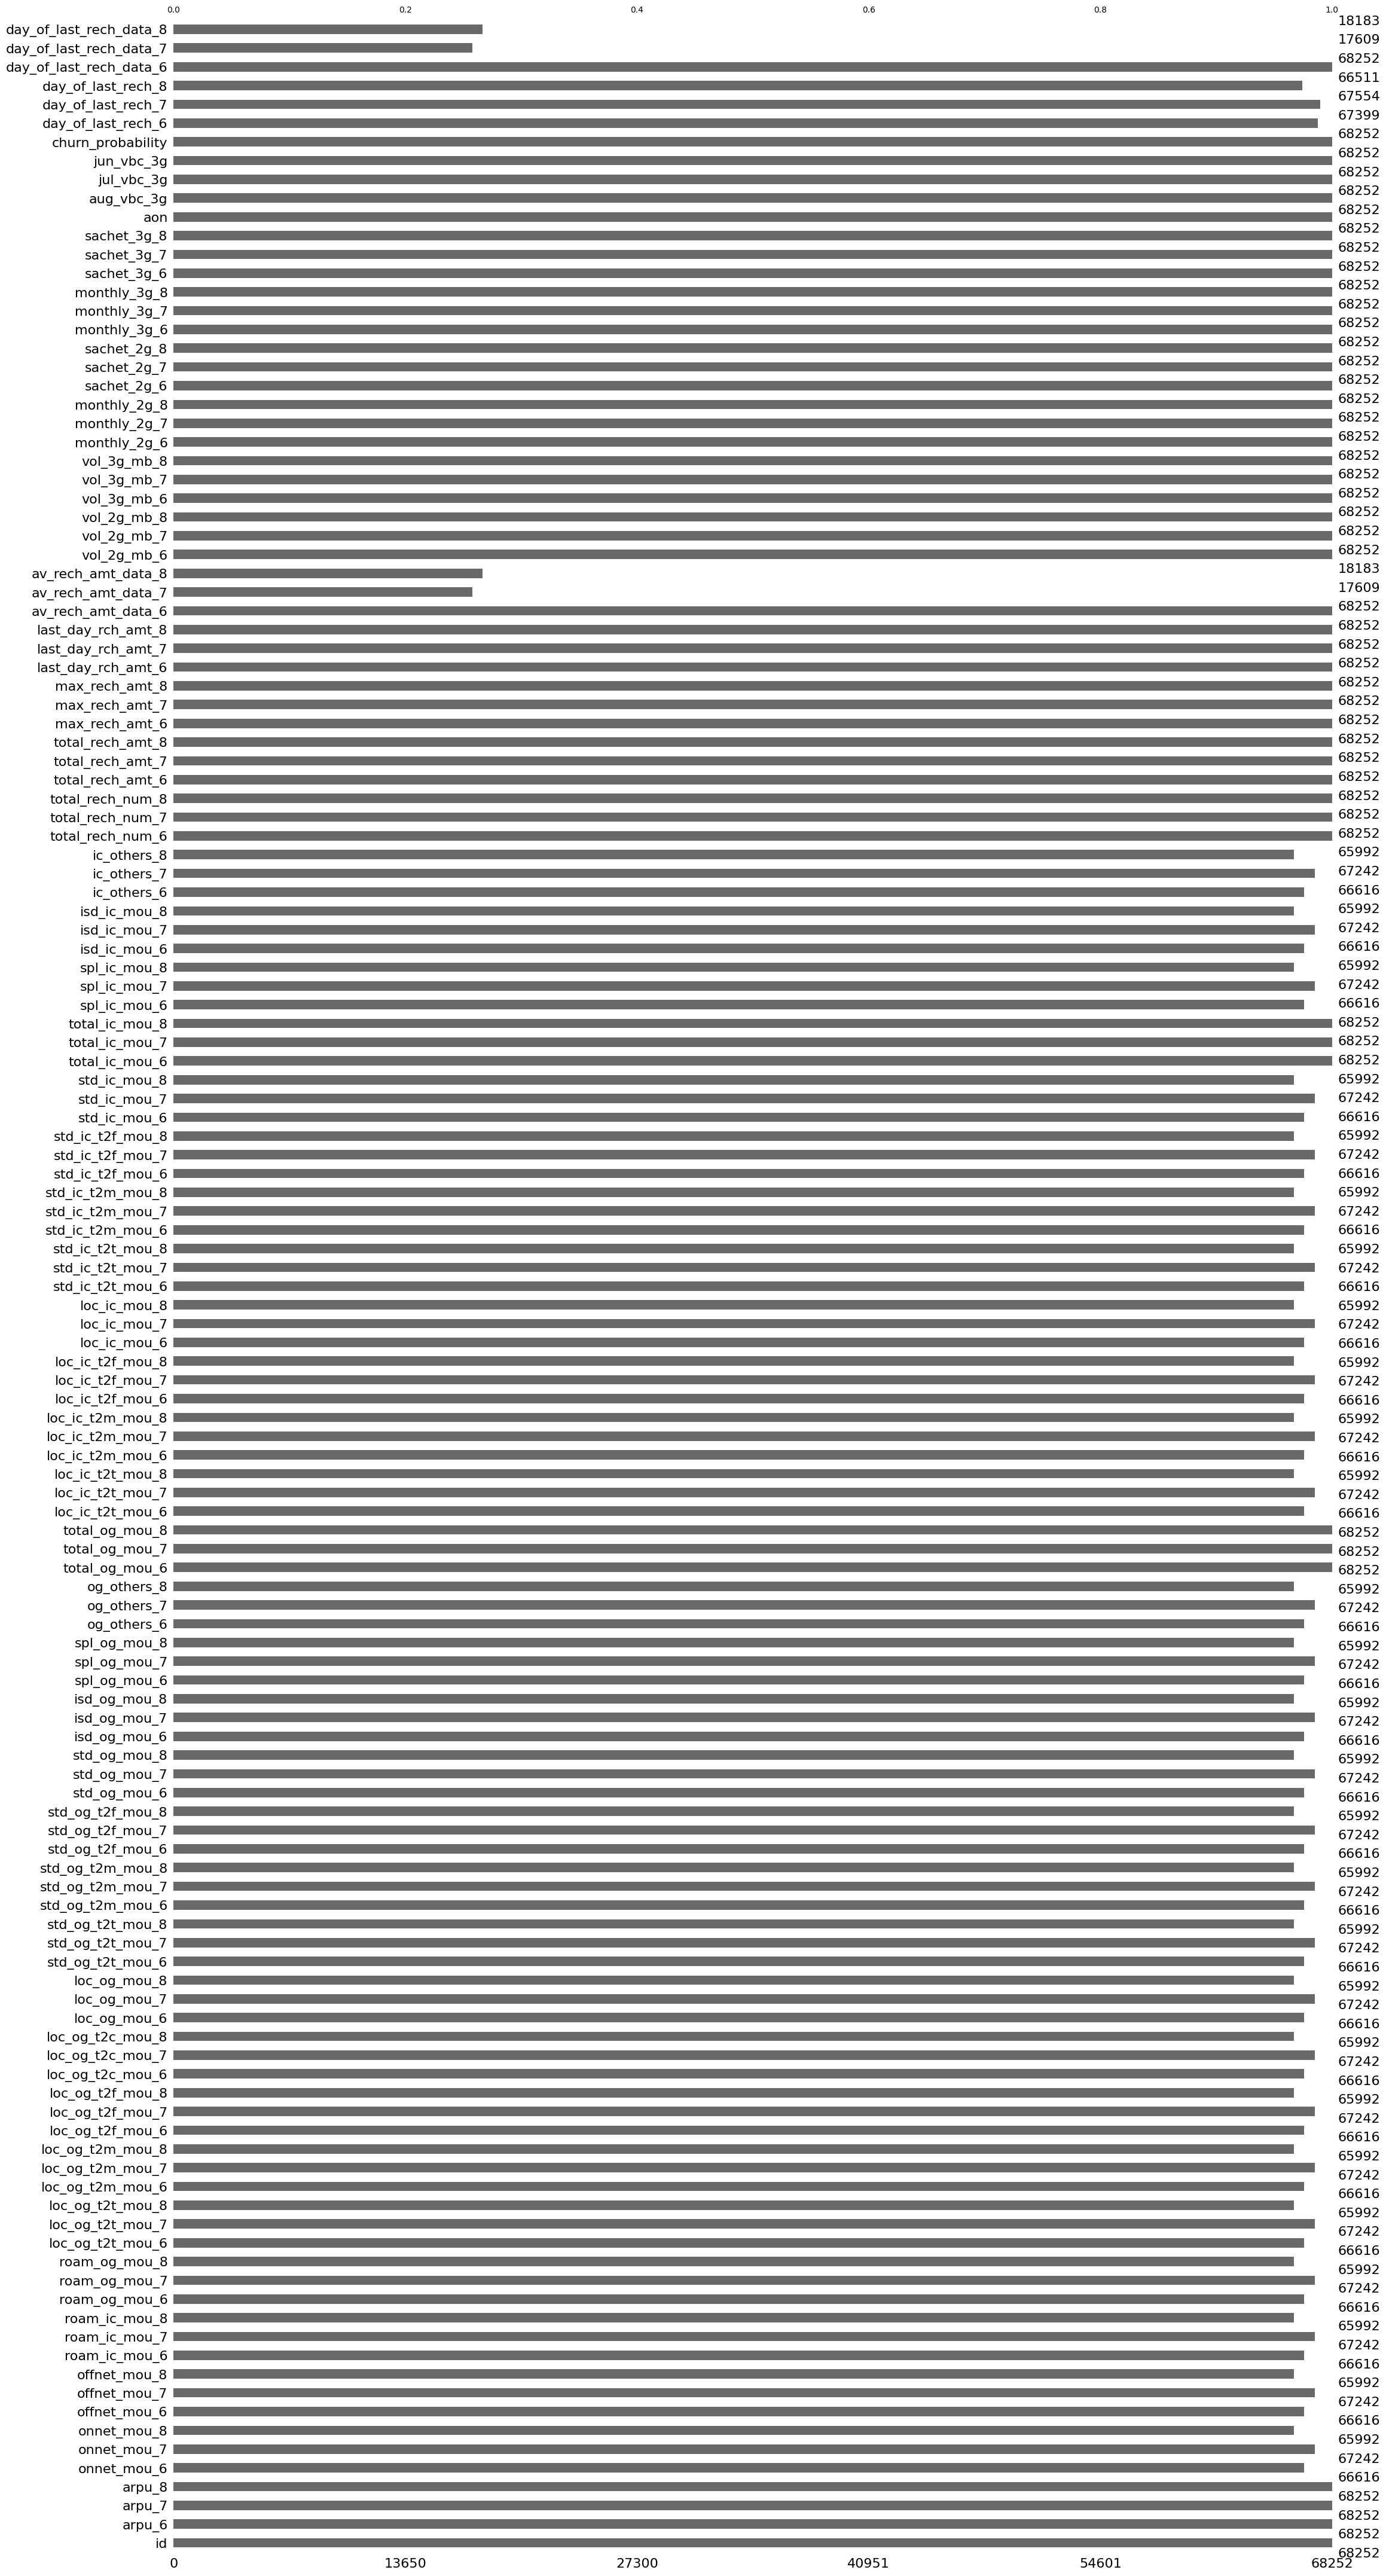

In [30]:
msno.bar(data)

<Axes: >

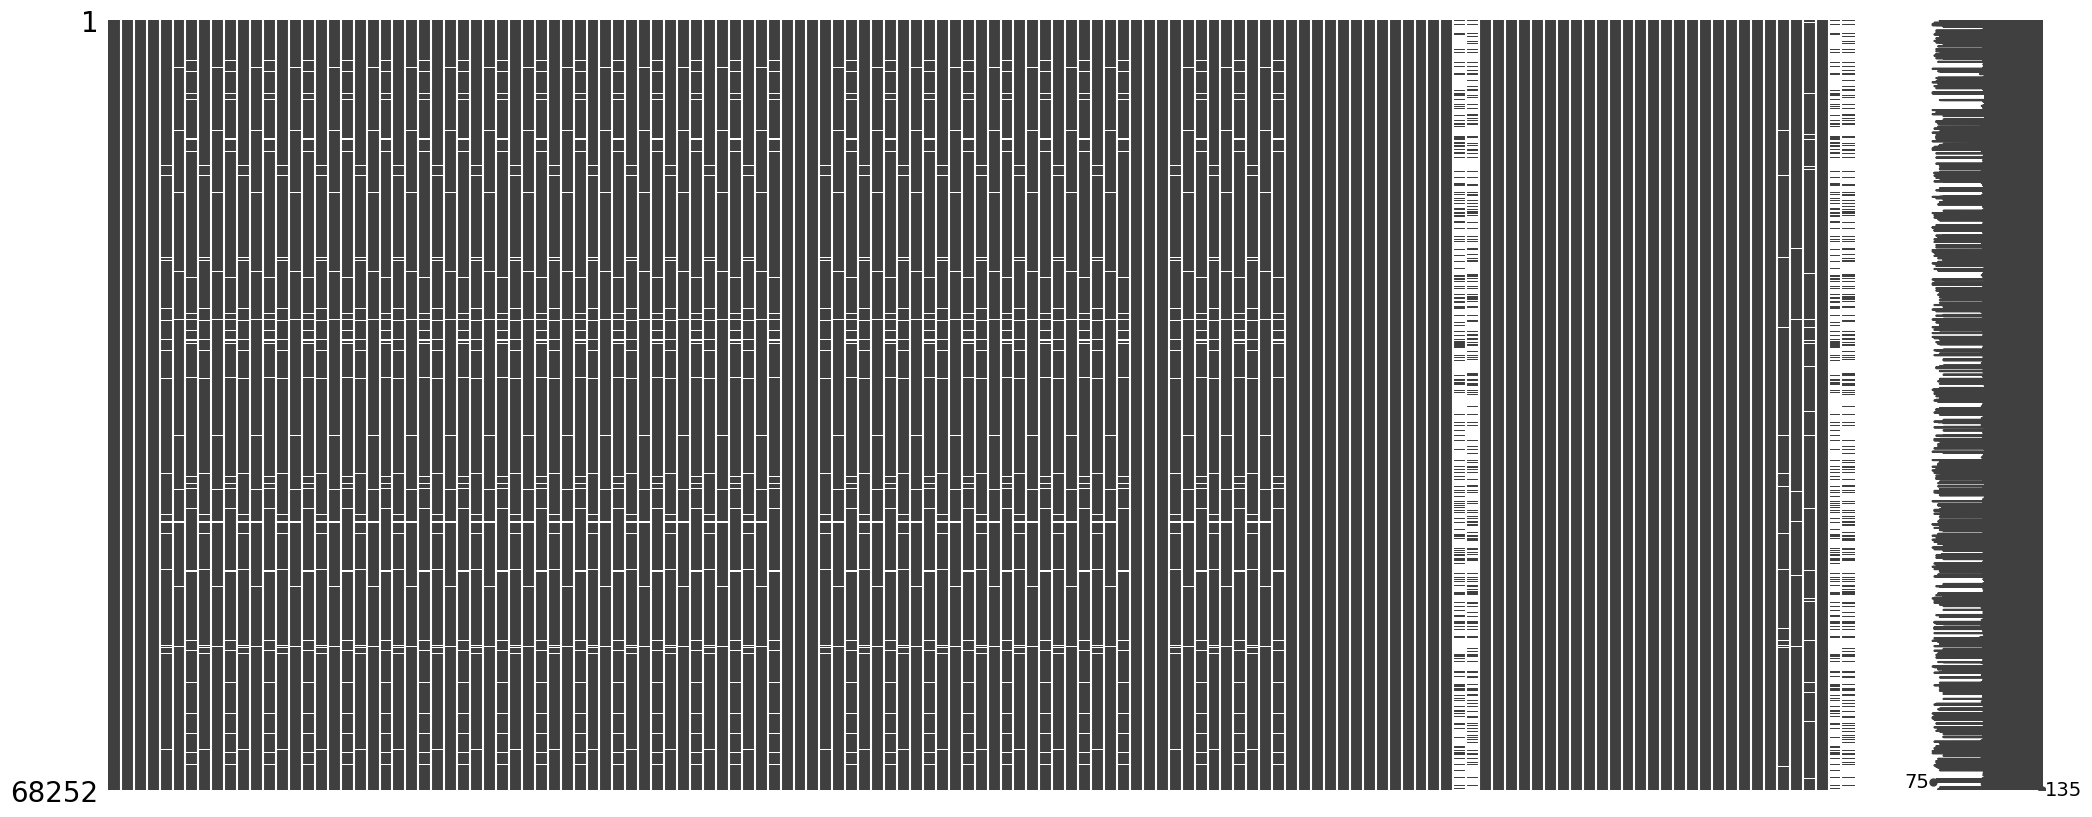

In [31]:
msno.matrix(data)

Lets also calculate the % missing data for each column:

In [32]:
missing_data_percent = 100*data.isnull().sum()/len(data.index)
missing_data_percent.sort_values(ascending=False)


day_of_last_rech_data_7    74.200023
av_rech_amt_data_7         74.200023
day_of_last_rech_data_8    73.359022
av_rech_amt_data_8         73.359022
loc_ic_t2m_mou_8            3.311258
                             ...    
last_day_rch_amt_7          0.000000
last_day_rch_amt_8          0.000000
vol_2g_mb_6                 0.000000
vol_2g_mb_7                 0.000000
id                          0.000000
Length: 135, dtype: float64

Since too much missing information would make a column not really a great predictor for churn, we drop these columns and keep only the ones which have less than 30% missing data.

In [33]:
new_vars = missing_data_percent[missing_data_percent.le(30)].index
new_vars

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability', 'day_of_last_rech_6', 'day_of_last_rech_7',
       'day_of_last_rech_8', 'day_of_last_rech_data_6'],
      dtype='object', length=131)

In [34]:
data_filtered = data[new_vars]
data_filtered.shape

(68252, 131)

In [35]:
# Calculating the missing value percentage on the data set
missing_data_percent = data_filtered.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

In our case, the values are missing because some of the customers have not used features such as 'calls within same network operator', 'calls outside the operator T Network' etc.
Hence these are meaningful and can be replaced with 0.

In [36]:
# Replacing the missing values with constant 0.

imp = SimpleImputer(strategy='constant', fill_value=0)
data_filtered[impute_cols] = imp.fit_transform(data_filtered[impute_cols])

<Axes: >

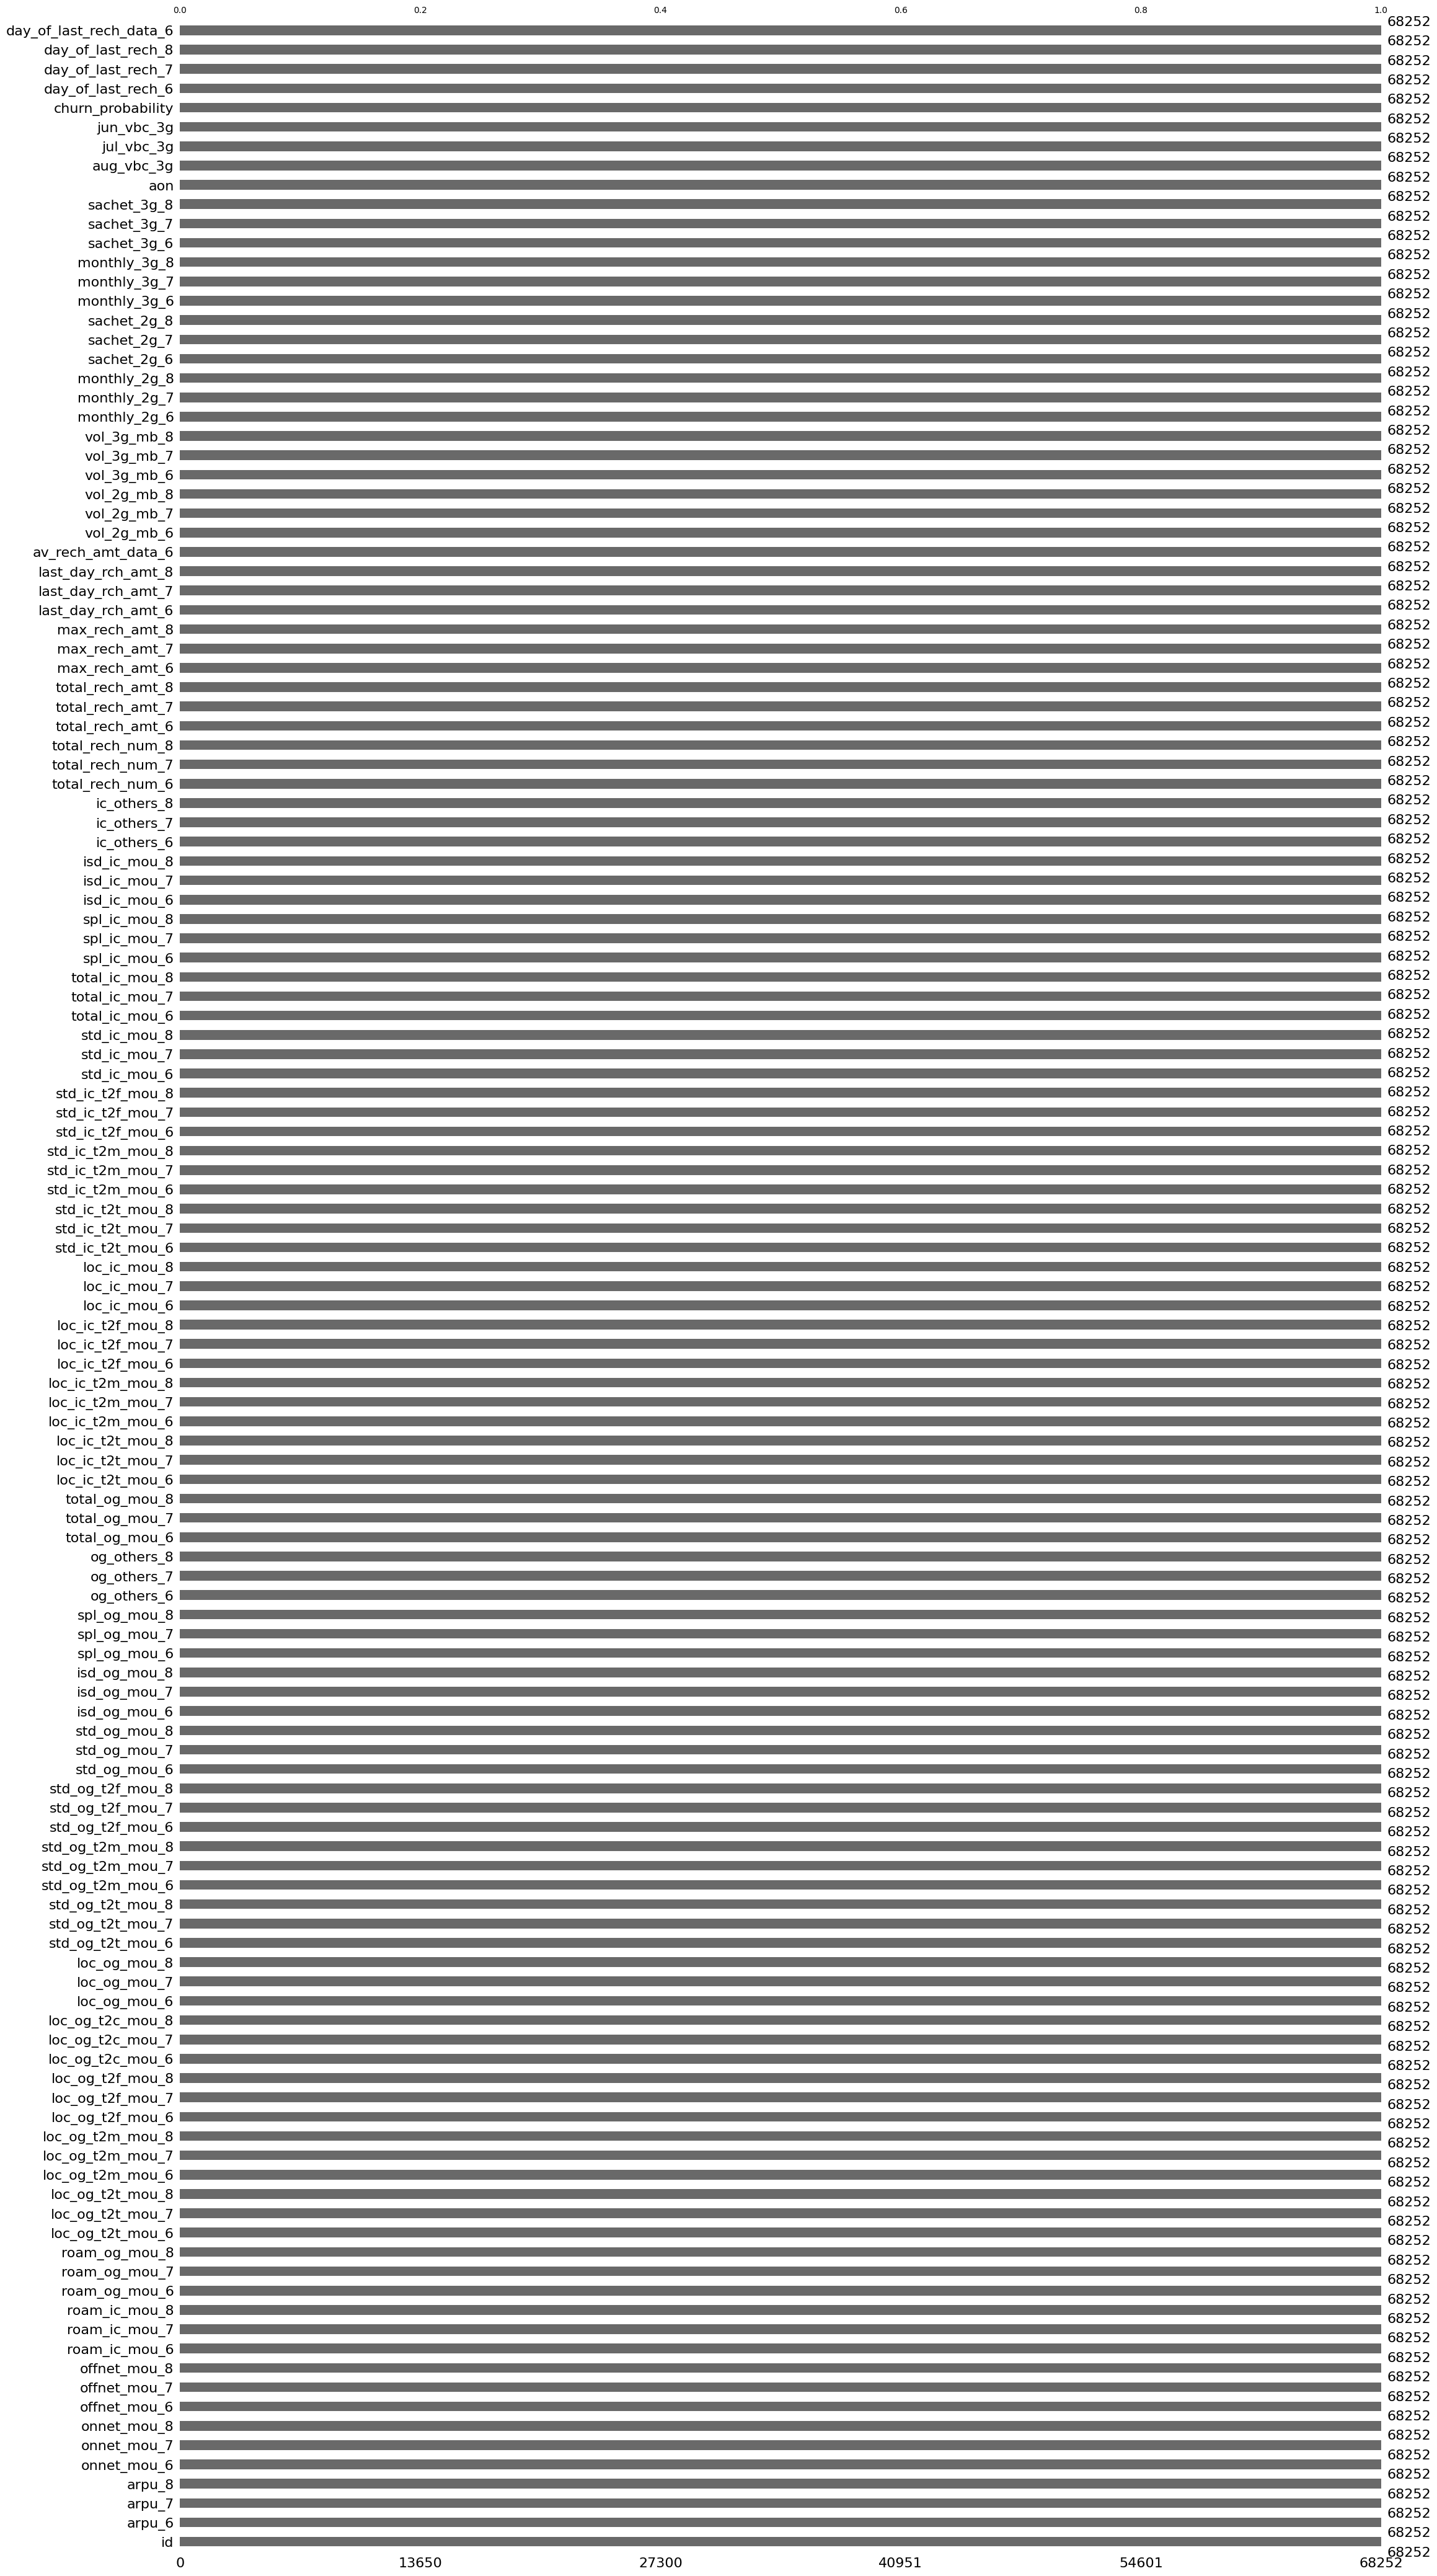

In [37]:
# Rechecking the value count for missing values
msno.bar(data_filtered)

We do not see any missing values in our training data set now.

In [38]:
# Summarizing the cleaned dataset
data_filtered.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,day_of_last_rech_data_6
count,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,...,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000
mean,34981.061581,285.171912,283.558300,283.482732,129.723777,131.980367,128.487570,193.951733,194.278465,190.048448,...,0.086693,1231.261516,69.135690,66.891489,60.711972,0.086635,23.951122,25.338056,24.867037,5.577009
std,20204.703134,332.470986,345.859195,353.962344,296.790001,309.506017,307.577363,314.393988,321.061509,320.797527,...,0.684518,955.276011,269.631398,269.497034,258.601986,0.281301,6.573957,6.202408,7.172443,8.950534
min,0.000000,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,17491.750000,95.109750,91.397500,88.083250,6.190000,5.980000,4.980000,31.140000,30.125000,26.580000,...,0.000000,472.000000,0.000000,0.000000,0.000000,0.000000,21.000000,23.000000,24.000000,1.000000
50%,34967.500000,199.268500,196.642500,196.167500,31.980000,31.100000,29.410000,92.310000,89.360000,86.030000,...,0.000000,882.000000,0.000000,0.000000,0.000000,0.000000,27.000000,27.000000,27.000000,1.000000
75%,52475.250000,372.976000,370.191750,374.656500,114.910000,112.965000,109.560000,227.195000,223.967500,221.045000,...,0.000000,1840.000000,0.000000,0.000000,0.000000,0.000000,29.000000,30.000000,30.000000,2.000000
max,69998.000000,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,7043.980000,14007.340000,...,41.000000,4337.000000,12916.220000,9165.600000,11166.210000,1.000000,30.000000,31.000000,31.000000,30.000000


# 3. Exploratory Data Analysis & Preprocessing



### 3.1 Handling outliers

Before we start the EDA, we need to check for all outliners in the dataset as it can impact on the accuracy of our analysis. 
For our analysis, we have used k-sigma method to cap the outliners.

In [39]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
data_filtered.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,day_of_last_rech_data_6
count,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,...,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000,68252.000000
mean,34981.061581,285.171912,283.558300,283.482732,129.723777,131.980367,128.487570,193.951733,194.278465,190.048448,...,0.086693,1231.261516,69.135690,66.891489,60.711972,0.086635,23.951122,25.338056,24.867037,5.577009
std,20204.703134,332.470986,345.859195,353.962344,296.790001,309.506017,307.577363,314.393988,321.061509,320.797527,...,0.684518,955.276011,269.631398,269.497034,258.601986,0.281301,6.573957,6.202408,7.172443,8.950534
min,0.000000,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,17491.750000,95.109750,91.397500,88.083250,6.190000,5.980000,4.980000,31.140000,30.125000,26.580000,...,0.000000,472.000000,0.000000,0.000000,0.000000,0.000000,21.000000,23.000000,24.000000,1.000000
50%,34967.500000,199.268500,196.642500,196.167500,31.980000,31.100000,29.410000,92.310000,89.360000,86.030000,...,0.000000,882.000000,0.000000,0.000000,0.000000,0.000000,27.000000,27.000000,27.000000,1.000000
75%,52475.250000,372.976000,370.191750,374.656500,114.910000,112.965000,109.560000,227.195000,223.967500,221.045000,...,0.000000,1840.000000,0.000000,0.000000,0.000000,0.000000,29.000000,30.000000,30.000000,2.000000
90%,62994.900000,623.124500,621.776300,621.472300,336.328000,342.837000,333.287000,473.580000,477.405000,475.926000,...,0.000000,2803.000000,167.636000,143.349000,113.884000,0.000000,30.000000,31.000000,31.000000,24.000000
95%,66489.450000,836.405400,830.991850,834.514300,605.490000,620.625500,604.855000,726.410000,742.330500,725.173500,...,0.000000,3109.000000,472.233500,454.156000,404.444000,1.000000,30.000000,31.000000,31.000000,28.000000
99%,69298.490000,1400.430010,1424.044920,1452.935120,1436.790200,1472.973300,1457.757600,1530.349200,1536.694300,1501.416700,...,2.000000,3651.000000,1243.354200,1256.604100,1191.910400,1.000000,30.000000,31.000000,31.000000,30.000000


In [40]:
# Function to cap the outliners
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [41]:
# Removing the outliners
data_filtered1 = data_filtered.apply(cap_outliers, axis=0)
data_filtered1

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,day_of_last_rech_data_6
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0.0,1958.0,0.00,0.00000,0.000000,0.0,22.0,10.0,24.0,1
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,0.0,710.0,0.00,0.00000,0.000000,0.0,12.0,10.0,26.0,1
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0.0,882.0,0.00,0.00000,0.000000,0.0,11.0,22.0,24.0,1
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0.0,982.0,0.00,0.00000,0.000000,0.0,15.0,21.0,25.0,1
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,0.0,647.0,0.00,0.00000,0.000000,0.0,25.0,26.0,30.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,69994,15.760,410.924,329.136,0.00,7.36,10.93,0.00,488.46,381.64,...,0.0,221.0,0.00,0.00000,0.000000,0.0,18.0,31.0,31.0,1
69995,69995,160.083,289.129,265.772,116.54,196.46,232.63,49.53,96.28,48.06,...,0.0,712.0,0.00,0.00000,0.000000,0.0,28.0,31.0,27.0,1
69996,69996,372.088,258.374,279.782,77.13,68.44,78.44,335.54,227.94,263.84,...,0.0,879.0,0.00,0.00000,0.000000,0.0,25.0,30.0,29.0,1
69997,69997,238.575,245.414,145.062,14.01,7.64,6.71,30.34,16.68,12.56,...,0.0,277.0,664.25,875.38259,836.517929,0.0,29.0,19.0,26.0,17


### 3.2 Univariate Analysis

We will now perform univariate analysis on the features to check if they have any visible pattern with respect to the churn rate.

Text(0.5, 1.0, 'Count of CHURN variable')

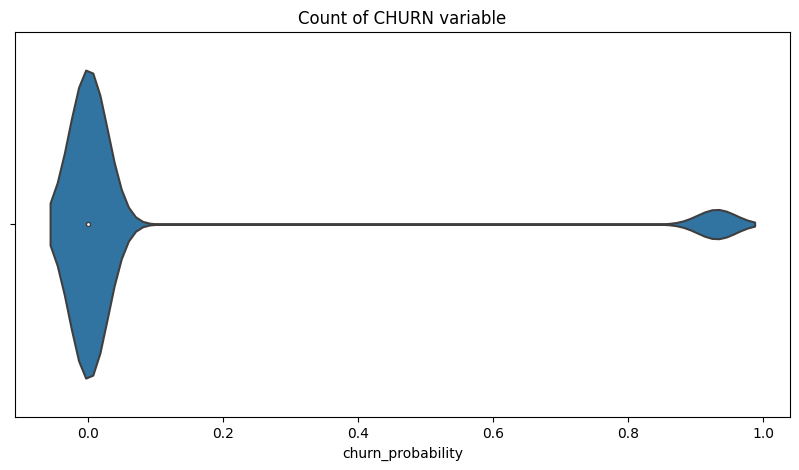

In [42]:
# Checking the distribution of Churned customers in the training dataset.
plt.figure(figsize=(10,5))
sns.violinplot(x='churn_probability', data=data_filtered1)
plt.title("Count of CHURN variable")

Observation: Less number of customers with higher churning probability. There can be a class imbalance.

As per the problem statement, the first two months are customers' good phase and the next month is action phase.
For our Univariate Analysis, we have categorized the columns into following sections:

- Churn probability trend on recharge amount in good phase and action phase : Average revenue per user and total recharge Amount
- Churn probability with respect to Age on network  number of days the customer is using the operator T network
- Churn probability varying with count of recharges every month
- Churn probability rate with respect to customer usage pattern : MOU outgoing, MOU incoming

In [43]:
# Checking if the churn probability depends on Average revenue per user , total recharge and max recharge amount

# Deriving columns for the univariate analysis
data_filtered1['average_Rev_good'] = data_filtered1['arpu_6'] + data_filtered1['arpu_7']
data_filtered1['total_recharge_good'] = data_filtered1['total_rech_amt_6'] + data_filtered1['total_rech_amt_7']

[Text(0, 0.5, 'average rev')]

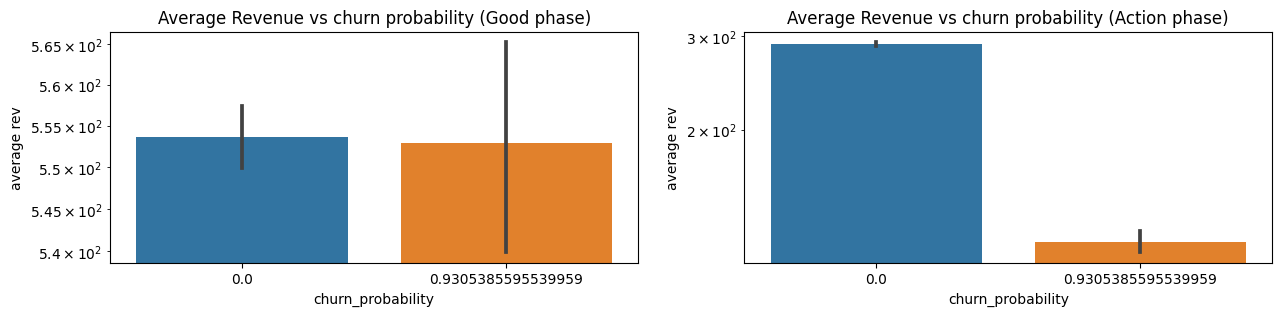

In [44]:
# Data plotting for visualization : Customer Average Revenue
fig = plt.figure(figsize=(15,3))

ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(data=data_filtered1, x = 'churn_probability', y='average_Rev_good')
ax1.set(title = 'Average Revenue vs churn probability (Good phase)')
#ax1.legend(["No-Churn","Churn"],loc='upper right')
plt.yscale('log')
ax1.set(ylabel= 'average rev')

ax1 = fig.add_subplot(1, 2, 2)
ax1 = sns.barplot(data=data_filtered1, x = 'churn_probability', y='arpu_8')
ax1.set(title = 'Average Revenue vs churn probability (Action phase)')
#ax1.legend(["No-Churn","Churn"],loc='upper right')
plt.yscale('log')
ax1.set(ylabel= 'average rev')

Observation : During the first two months, the chances of a customer to stop the service is almost same as happy customers but he chances decrease significantly in the action phase. If a customer does not churn in the first two months, he is more likely to continue the service in the next months.

[Text(0, 0.5, 'average rev')]

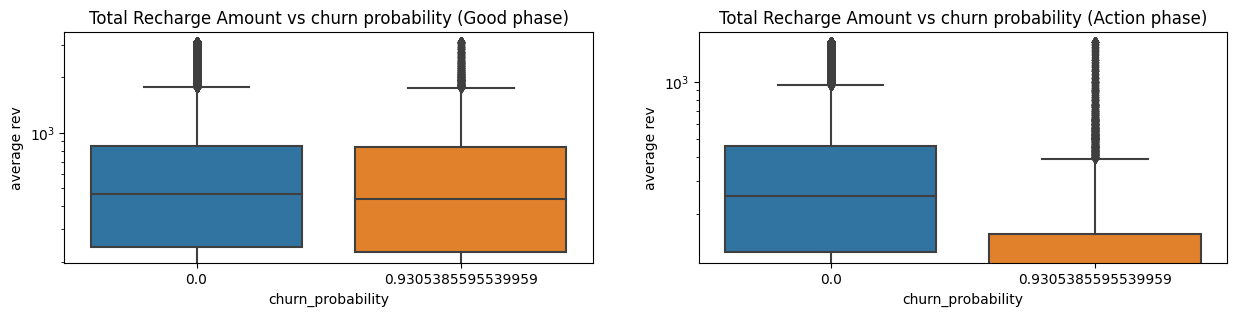

In [45]:
# Data plotting for visualization : Customer Total Recharge
fig = plt.figure(figsize=(15,3))

ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.boxplot(data=data_filtered1, x = 'churn_probability', y='total_recharge_good')
ax1.set(title = 'Total Recharge Amount vs churn probability (Good phase)')
#ax1.legend(["No-Churn","Churn"],loc='upper right')
plt.yscale('log')
ax1.set(ylabel= 'average rev')

ax1 = fig.add_subplot(1, 2, 2)
ax1 = sns.boxplot(data=data_filtered1, x = 'churn_probability', y='total_rech_amt_8')
ax1.set(title = 'Total Recharge Amount vs churn probability (Action phase)')
#ax1.legend(["No-Churn","Churn"],loc='upper right')
plt.yscale('log')
ax1.set(ylabel= 'average rev')

Observation : During the good phase (initial 2 months, the churn probability is almost same as non-churn probability), during the action phase, the churn probability decreases.

In [46]:
# Dropping off the columns average_Rev_good and total_recharge_good as they are derived only for our EDA.

data_filtered1.drop(['average_Rev_good','total_recharge_good'],axis=1,inplace=True)

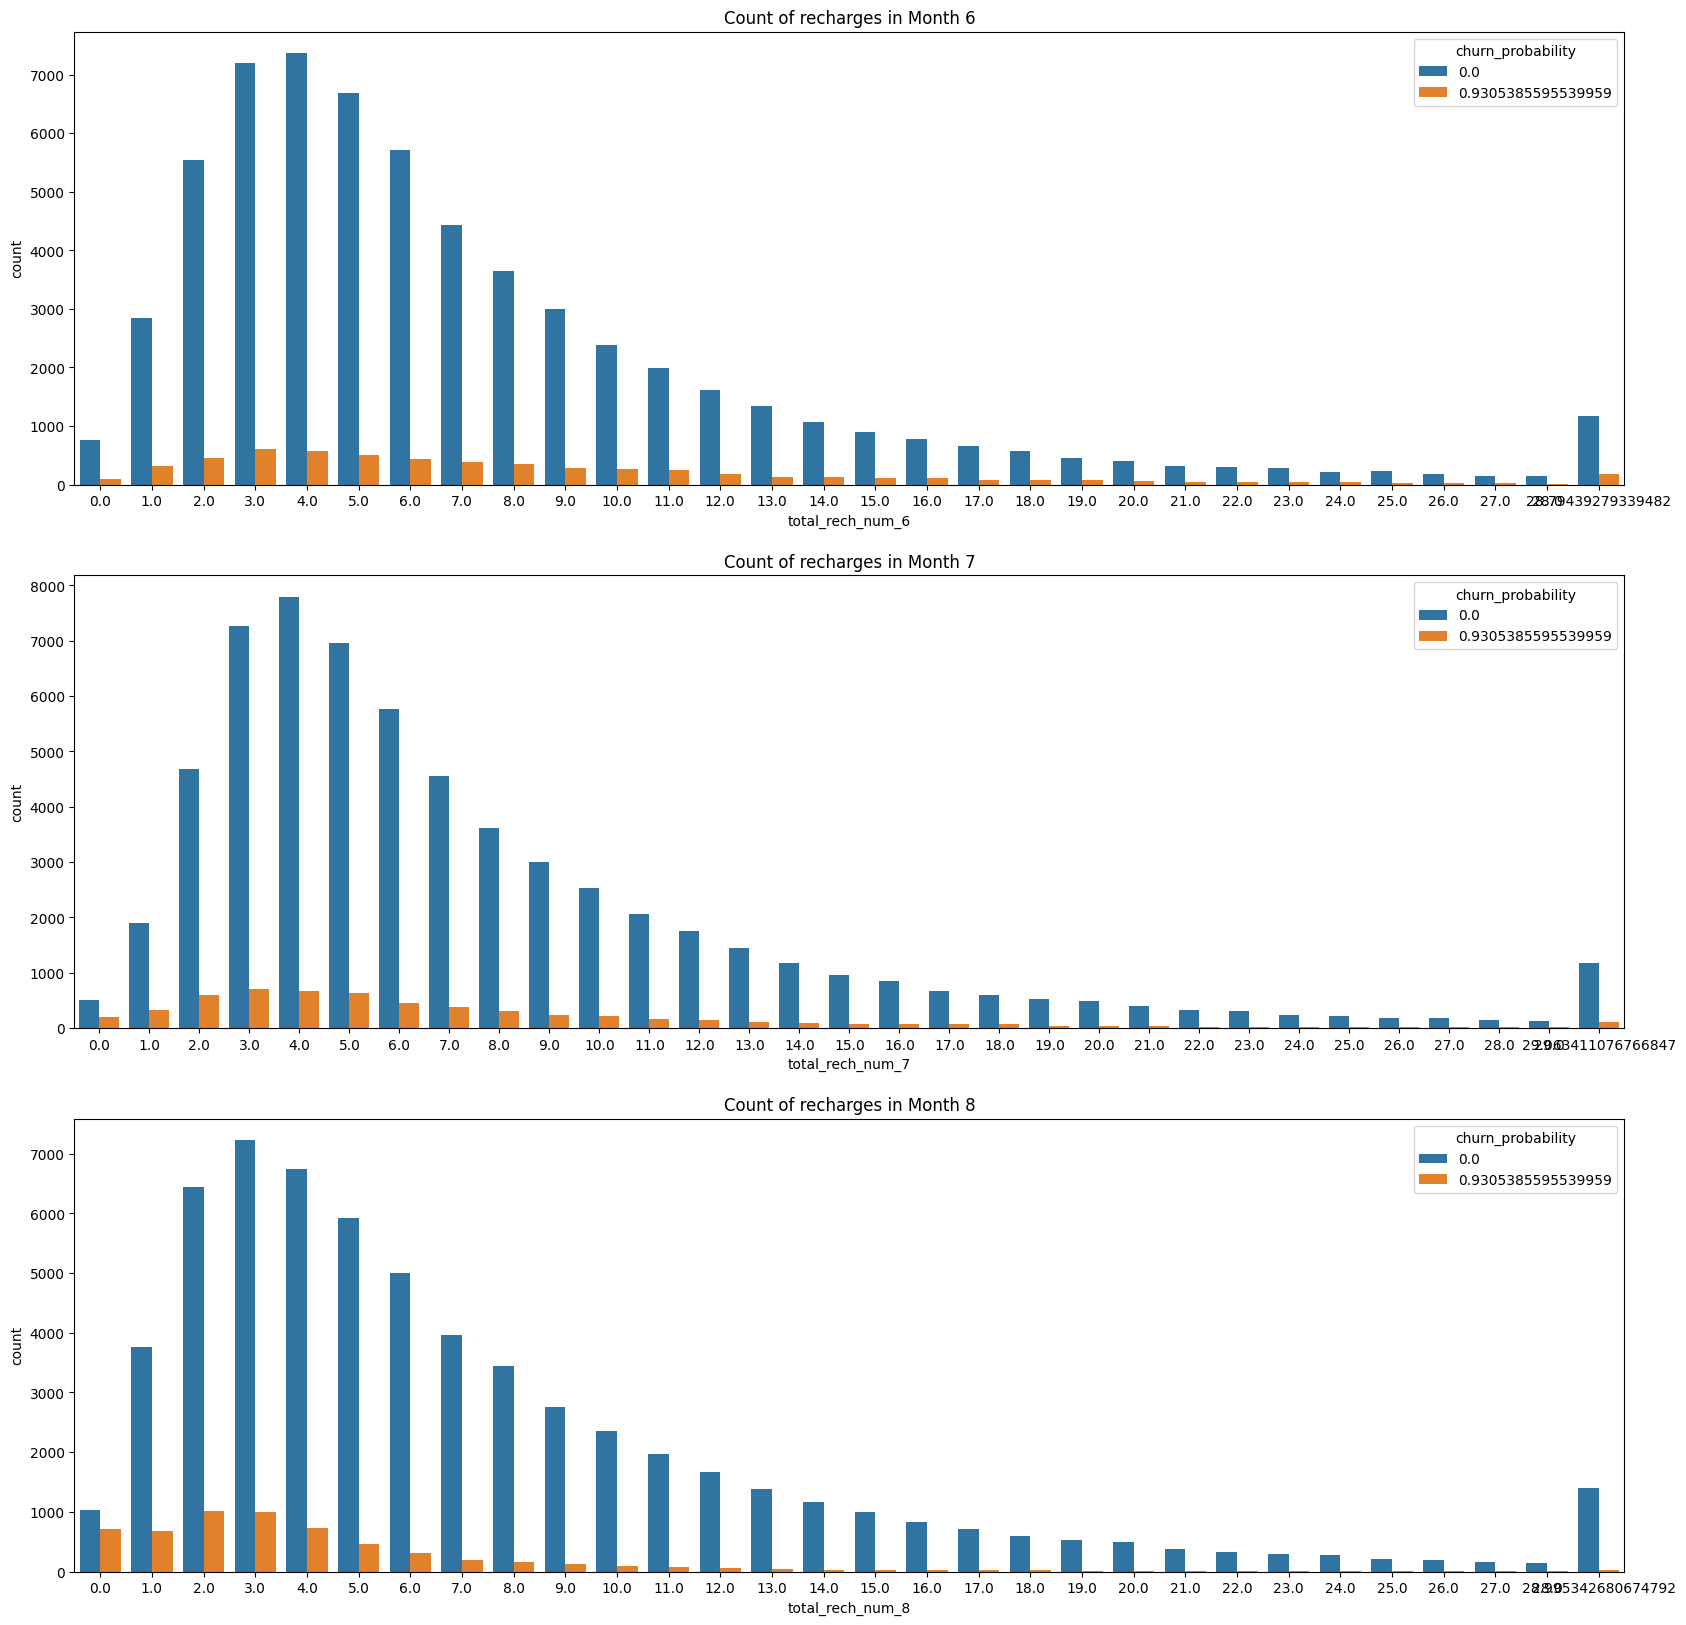

In [47]:
# Data plotting for visualization - total count of recharges for month 6 , 7 and 8
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(3, 1, 1)
ax1 = sns.countplot(data = data_filtered1 , x="total_rech_num_6", hue='churn_probability')
ax1.set(title = 'Count of recharges in Month 6')

ax2 = fig.add_subplot(3, 1, 2)
ax2 = sns.countplot(data = data_filtered1 , x="total_rech_num_7", hue='churn_probability')
ax2.set(title = 'Count of recharges in Month 7')

ax3 = fig.add_subplot(3, 1, 3)
ax3 = sns.countplot(data = data_filtered1 , x="total_rech_num_8", hue='churn_probability')
ax3.set(title = 'Count of recharges in Month 8')
plt.show()

Observation: Unlike the previous parameters, here we can see that churn probability increases for customers with count of recharges between 0 to 4 during the action phase.

In [48]:
# Checking if the churn probability depends on usage behaviour of customers.

# Deriving columns for the univariate analysis
data_filtered1['total_mou_og'] = data_filtered1['total_og_mou_6'] + data_filtered1['total_og_mou_7'] + data_filtered1['total_og_mou_8']
data_filtered1['total_ic_mou'] = data_filtered1['total_ic_mou_6'] + data_filtered1['total_ic_mou_7'] + data_filtered1['total_ic_mou_8']

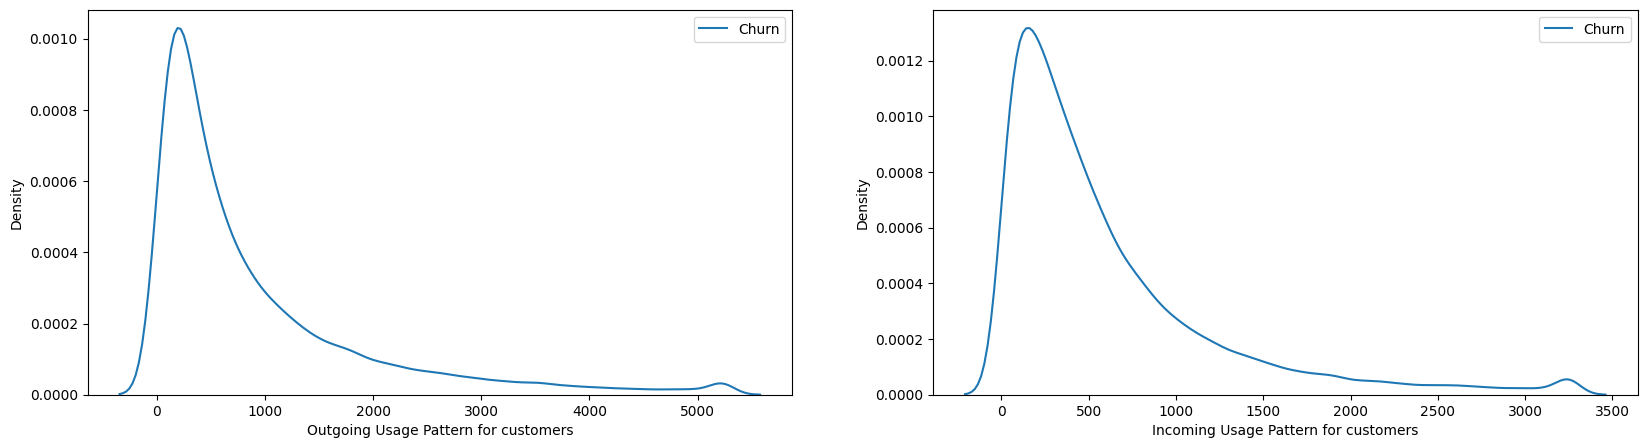

In [49]:
# Data plotting for visualization - total MOU for month 6 , 7 and 8
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.distplot(data_filtered1[data_filtered1.churn_probability == 0 ]['total_mou_og'],label='non churn',hist=False)
ax1.set(xlabel='Outgoing Usage Pattern for customers')
ax1.legend(["Churn","No-Churn"],loc='upper right')

ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.distplot(data_filtered1[data_filtered1.churn_probability == 0 ]['total_ic_mou'],label='non churn',hist=False)
ax2.set(xlabel='Incoming Usage Pattern for customers')
ax2.legend(["Churn","No-Churn"],loc='upper right')
plt.show()

Observation: Churn probability is very high for customers with low outgoing and incoming usages.

In [50]:
# Dropping the derived columns
data_filtered1.drop(['total_mou_og','total_ic_mou'],axis=1,inplace=True)

All the features show right skewed distribution. We can not use any Linear Regression Model here. Log transformation can be a good choice here.

### 3.3 Bivariate Analysis

<Axes: >

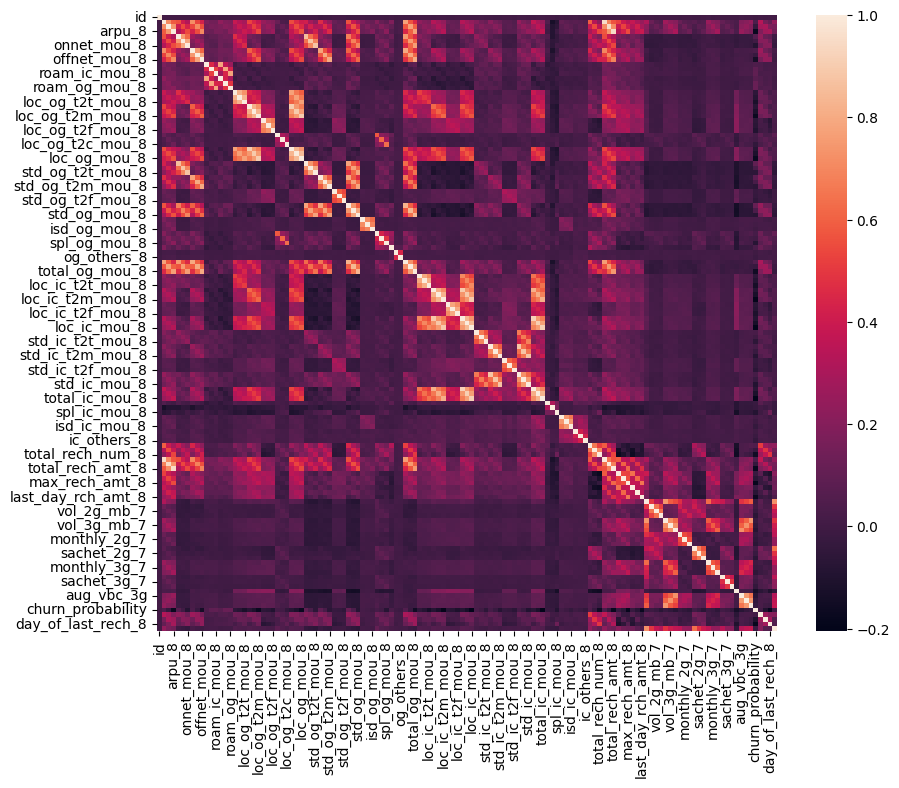

In [51]:
# Checking correlation among independent variables
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(data_filtered1, columns=new_vars).corr())

Too many features show high correlation among each other. The number of features in our dataset being too many, it is very difficult to identify and remove the correlated variables manually. Instead, we will try to perform some dimentionality reduction techniques to handle the multicollinearity problem.

# 4. Train-Test Data



### 4.1 Train-test Split

Since we have good number of data available, we can split the dataset for our model training and evaluation. 

In [52]:
# Splitting into X and y
X = data_filtered.drop('churn_probability',axis=1)
y = data_filtered['churn_probability']

In [53]:
# Splitting into train and test sets.
X_train_filtered, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=100)

X_train_filtered.shape, X_test.shape, y_train.shape, y_test.shape

((54601, 130), (13651, 130), (54601,), (13651,))

In [54]:
X_test_main = X_test
y_test_main = y_test

In [55]:
y_train = y_train.apply(lambda x: 1 if x>0 else 0)

In [56]:
y_train.value_counts()

churn_probability
0    49896
1     4705
Name: count, dtype: int64

### 4.2 Feature scaling

Lets also scale the features by scaling them with Standard scaler 

In [57]:
num_col = X_train_filtered.select_dtypes(include = ['int64','float64']).columns.tolist()
scale = StandardScaler()
X_train_filtered[num_col] = scale.fit_transform(X_train_filtered[num_col])

In [58]:
X_train_filtered.shape

(54601, 130)

### 4.3 Handling data imbalance

In [59]:
# Instantiate SMOTE
smt = SMOTE(random_state=42)

In [60]:
# Fitting SMOTE to the train set
X_train_smt, y_train_smt = smt.fit_resample(X_train_filtered,y_train)

In [61]:
X_train_smt.shape

(99792, 130)

In [62]:
y_train_smt.shape

(99792,)

In [63]:
# Scaling the test set
X_test[num_col] = scale.transform(X_test[num_col])

# 5. Model Building

## 5.1. Logistic Regression with RFE

### 5.1.1 Instantiating Model

In [64]:
# Logistic regression model
logm1 = sm.GLM(y_train_smt,(sm.add_constant(X_train_smt)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                99792
Model:                            GLM   Df Residuals:                    99661
Model Family:                Binomial   Df Model:                          130
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37987.
Date:                Tue, 10 Dec 2024   Deviance:                       75974.
Time:                        10:59:47   Pearson chi2:                 1.84e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4647
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.0900      0.023    -90.681      0.000      -2.135      -2.045
id                          0.0112      0.010      1.145      0.252      -0.008       0.030
arpu_6                      0.1175      0.047      2.510      0.012       0.026       0.209
arpu_7                      0.2939      0.049      6.048      0.000       0.199       0.389
arpu_8                      0.3225      0.052      6.188      0.000       0.220       0.425
onnet_mou_6                -0.2290      0.069     -3.309      0.001      -0.365      -0.093
onnet_mou_7                -0.0753      0.090     -0.833      0.405      -0.252       0.102
onnet_mou_8                -0.0404      0.097     -0.419      0.676      -0.230       0.149
offnet_mou_6               -0.0406      0.072     -0.561      0.575      -0.183       0.101
offnet_mou_7                0.0250      0.087      0.287      0.774      -0.146       0.196
offnet_mou_8               -0.7336      0.089     -8.286      0.000      -0.907      -0.560
roam_ic_mou_6              -0.0152      0.017     -0.898      0.369      -0.048       0.018
roam_ic_mou_7               0.1253      0.017      7.568      0.000       0.093       0.158
roam_ic_mou_8              -0.0009      0.014     -0.061      0.951      -0.029       0.027
roam_og_mou_6               0.1144      0.018      6.202      0.000       0.078       0.151
roam_og_mou_7               0.0204      0.018      1.157      0.247      -0.014       0.055
roam_og_mou_8               0.3262      0.018     18.641      0.000       0.292       0.361
loc_og_t2t_mou_6           -0.0161      0.064     -0.252      0.801      -0.141       0.109
loc_og_t2t_mou_7            0.2592      0.077      3.383      0.001       0.109       0.409
loc_og_t2t_mou_8           -0.8128      0.089     -9.144      0.000      -0.987      -0.639
loc_og_t2m_mou_6           -0.3532      0.092     -3.844      0.000      -0.533      -0.173
loc_og_t2m_mou_7            0.4284      0.107      4.005      0.000       0.219       0.638
loc_og_t2m_mou_8           -0.7362      0.121     -6.085      0.000      -0.973      -0.499
loc_og_t2f_mou_6           -0.1284      0.021     -6.009      0.000      -0.170      -0.087
loc_og_t2f_mou_7            0.1006      0.024      4.283      0.000       0.055       0.147
loc_og_t2f_mou_8            0.0114      0.024      0.474      0.636      -0.036       0.059
loc_og_t2c_mou_6           -0.0598      0.014     -4.429      0.000      -0.086      -0.033
loc_og_t2c_mou_7            0.0038      0.015      0.257      0.797      -0.025       0.032
loc_og_t2c_mou_8            0.0890      0.017      5.390      0.000       0.057       0.121
loc_og_mou_6                0.3748      0.143      2.614      0.009       0.094       0.656
loc_og_mou_7               -0.6972      0.167  

### 5.1.2 Feature Selection Using RFE

In [313]:
logreg = LogisticRegression()

In [314]:
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_smt, y_train_smt)

In [315]:
# Check features with RFE support
list(zip(X_train_smt.columns, rfe.support_, rfe.ranking_))

[('id', False, 100),
 ('arpu_6', False, 51),
 ('arpu_7', False, 6),
 ('arpu_8', False, 18),
 ('onnet_mou_6', False, 36),
 ('onnet_mou_7', False, 34),
 ('onnet_mou_8', False, 96),
 ('offnet_mou_6', False, 66),
 ('offnet_mou_7', False, 97),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 88),
 ('roam_ic_mou_7', False, 26),
 ('roam_ic_mou_8', False, 113),
 ('roam_og_mou_6', False, 39),
 ('roam_og_mou_7', False, 82),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 95),
 ('loc_og_t2t_mou_7', False, 99),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 35),
 ('loc_og_t2m_mou_7', False, 54),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 41),
 ('loc_og_t2f_mou_7', False, 42),
 ('loc_og_t2f_mou_8', False, 79),
 ('loc_og_t2c_mou_6', False, 46),
 ('loc_og_t2c_mou_7', False, 107),
 ('loc_og_t2c_mou_8', False, 45),
 ('loc_og_mou_6', False, 38),
 ('loc_og_mou_7', False, 101),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 37),
 ('std_og_t2t_mou_7'

In [316]:
col = X_train_smt.columns[rfe.support_]

### 5.1.3. Assessing the model with StatsModels

In [317]:
X_train_sm = sm.add_constant(X_train_smt[col])
logm2 = sm.GLM(y_train_smt,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                99792
Model:                            GLM   Df Residuals:                    99776
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41643.
Date:                Tue, 10 Dec 2024   Deviance:                       83285.
Time:                        18:00:15   Pearson chi2:                 3.28e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4240
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9417      0.019   -104.372      0.000      -1.978      -1.905
offnet_mou_8          -0.0435      0.019     -2.296      0.022      -0.081      -0.006
roam_og_mou_8          0.4310      0.009     47.235      0.000       0.413       0.449
loc_og_t2t_mou_8      -0.6069      0.067     -9.051      0.000      -0.738      -0.475
loc_og_t2m_mou_8      -0.7409      0.084     -8.780      0.000      -0.906      -0.576
loc_og_mou_8           0.7556      0.119      6.324      0.000       0.521       0.990
std_og_mou_8          -0.0219      0.015     -1.462      0.144      -0.051       0.007
loc_ic_t2t_mou_8      -1.1715      0.058    -20.268      0.000      -1.285      -1.058
loc_ic_t2m_mou_8      -2.2597      0.075    -29.945      0.000      -2.408      -2.112
loc_ic_t2f_mou_8      -0.6830      0.028    -24.130      0.000      -0.738      -0.628
loc_ic_mou_7           0.7112      0.023     31.031      0.000       0.666       0.756
loc_ic_mou_8           0.8429      0.108      7.808      0.000       0.631       1.055
spl_ic_mou_8          -0.9310      0.023    -41.132      0.000      -0.975      -0.887
last_day_rch_amt_8    -0.9302      0.015    -61.030      0.000      -0.960      -0.900
aon                   -0.5522      0.012    -47.436      0.000      -0.575      -0.529
day_of_last_rech_8    -0.4916      0.009    -53.090      0.000      -0.510      -0.473
======================================================================================
"""

In [318]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm.astype(float))
y_train_pred[:10]

0    0.949120
1    0.670225
2    0.013020
3    0.002565
4    0.446645
5    0.638575
6    0.007706
7    0.776366
8    0.072140
9    0.344356
dtype: float64

In [319]:
# Reshaping the predicted values on train set
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.94911993, 0.67022481, 0.01302029, 0.00256454, 0.4466446 ,
       0.63857467, 0.00770598, 0.77636641, 0.07214008, 0.34435638])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [320]:
y_train_pred_final = pd.DataFrame({'Churn':y_train_smt.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train_smt.index
y_train_pred_final.head()

,Churn,Churn_Prob,ID
0,1,0.949120,0
1,0,0.670225,1
2,0,0.013020,2
3,0,0.002565,3
4,0,0.446645,4


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [321]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted
0,1,0.949120,0,1
1,0,0.670225,1,1
2,0,0.013020,2,0
3,0,0.002565,3,0
4,0,0.446645,4,0


Creating the confusion matrix

In [322]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[38876 11020]
 [ 5610 44286]]


In [323]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8333533750200417


The overall accuracy looks quite good, but we have seen a lot of collinear features in the multivariant analysis. 
We will also check VIFs for all feature variables to reduce chances of multicollinearity and improve the model

In [324]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smt[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[col].astype(float).values, i) for i in range(X_train_smt[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,loc_ic_mou_8,49.22
4,loc_og_mou_8,48.86
3,loc_og_t2m_mou_8,25.74
7,loc_ic_t2m_mou_8,25.06
2,loc_og_t2t_mou_8,11.22
6,loc_ic_t2t_mou_8,9.20
0,offnet_mou_8,4.06
9,loc_ic_mou_7,3.02
5,std_og_mou_8,2.47
8,loc_ic_t2f_mou_8,2.10


We can see very high VIF value for 'loc_ic_mou_8'. So we will drop this column and rerun the model

In [325]:
col = col.drop('loc_ic_mou_8', 1)

In [326]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_smt[col])
logm3 = sm.GLM(y_train_smt,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                99792
Model:                            GLM   Df Residuals:                    99777
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41671.
Date:                Tue, 10 Dec 2024   Deviance:                       83341.
Time:                        18:00:35   Pearson chi2:                 3.17e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4237
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9418      0.019   -104.202      0.000      -1.978      -1.905
offnet_mou_8          -0.0430      0.019     -2.269      0.023      -0.080      -0.006
roam_og_mou_8          0.4312      0.009     47.269      0.000       0.413       0.449
loc_og_t2t_mou_8      -0.6620      0.067     -9.922      0.000      -0.793      -0.531
loc_og_t2m_mou_8      -0.7877      0.084     -9.343      0.000      -0.953      -0.622
loc_og_mou_8           0.8183      0.119      6.869      0.000       0.585       1.052
std_og_mou_8          -0.0237      0.015     -1.582      0.114      -0.053       0.006
loc_ic_t2t_mou_8      -0.7703      0.025    -30.783      0.000      -0.819      -0.721
loc_ic_t2m_mou_8      -1.7327      0.033    -51.982      0.000      -1.798      -1.667
loc_ic_t2f_mou_8      -0.5655      0.024    -23.637      0.000      -0.612      -0.519
loc_ic_mou_7           0.7382      0.023     32.383      0.000       0.693       0.783
spl_ic_mou_8          -0.9320      0.023    -41.161      0.000      -0.976      -0.888
last_day_rch_amt_8    -0.9314      0.015    -61.120      0.000      -0.961      -0.902
aon                   -0.5558      0.012    -47.788      0.000      -0.579      -0.533
day_of_last_rech_8    -0.4905      0.009    -53.019      0.000      -0.509      -0.472
======================================================================================
"""

In [327]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Churn,Churn_Prob,ID,predicted
0,1,0.948696,0,1
1,0,0.668103,1,1
2,0,0.013712,2,0
3,0,0.003157,3,0
4,0,0.439008,4,0


In [328]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8329124579124579


Overall accuracy doesnt show any reduction, so let us check the VIF again.

In [329]:
vif = pd.DataFrame()
vif['Features'] = X_train_smt[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[col].values, i) for i in range(X_train_smt[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_og_mou_8,48.37
3,loc_og_t2m_mou_8,25.38
2,loc_og_t2t_mou_8,11.07
0,offnet_mou_8,4.06
7,loc_ic_t2m_mou_8,3.31
9,loc_ic_mou_7,2.93
5,std_og_mou_8,2.47
6,loc_ic_t2t_mou_8,2.07
11,last_day_rch_amt_8,1.39
8,loc_ic_t2f_mou_8,1.37


Now we will drop 'loc_og_mou_8' and recheck the accuracy of the model.

In [330]:
col = col.drop('loc_og_mou_8', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_smt[col])
logm4 = sm.GLM(y_train_smt,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                99792
Model:                            GLM   Df Residuals:                    99778
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41692.
Date:                Tue, 10 Dec 2024   Deviance:                       83384.
Time:                        18:00:46   Pearson chi2:                 3.12e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4235
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9399      0.019   -104.154      0.000      -1.976      -1.903
offnet_mou_8          -0.0364      0.019     -1.924      0.054      -0.073       0.001
roam_og_mou_8          0.4302      0.009     47.210      0.000       0.412       0.448
loc_og_t2t_mou_8      -0.2403      0.024    -10.217      0.000      -0.286      -0.194
loc_og_t2m_mou_8      -0.2428      0.027     -9.034      0.000      -0.295      -0.190
std_og_mou_8          -0.0314      0.015     -2.096      0.036      -0.061      -0.002
loc_ic_t2t_mou_8      -0.7866      0.025    -31.354      0.000      -0.836      -0.737
loc_ic_t2m_mou_8      -1.7458      0.033    -52.184      0.000      -1.811      -1.680
loc_ic_t2f_mou_8      -0.5509      0.024    -23.178      0.000      -0.597      -0.504
loc_ic_mou_7           0.7388      0.023     32.346      0.000       0.694       0.784
spl_ic_mou_8          -0.9323      0.023    -41.168      0.000      -0.977      -0.888
last_day_rch_amt_8    -0.9311      0.015    -61.068      0.000      -0.961      -0.901
aon                   -0.5563      0.012    -47.847      0.000      -0.579      -0.534
day_of_last_rech_8    -0.4910      0.009    -53.094      0.000      -0.509      -0.473
======================================================================================
"""

In [331]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Churn,Churn_Prob,ID,predicted
0,1,0.948716,0,1
1,0,0.666871,1,1
2,0,0.012800,2,0
3,0,0.003097,3,0
4,0,0.446827,4,0


In [332]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8330727914061248


In [333]:
# Rechecking the VIF.
vif = pd.DataFrame()
vif['Features'] = X_train_smt[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[col].values, i) for i in range(X_train_smt[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_8,4.01
3,loc_og_t2m_mou_8,3.78
6,loc_ic_t2m_mou_8,3.30
8,loc_ic_mou_7,2.93
4,std_og_mou_8,2.44
5,loc_ic_t2t_mou_8,2.07
2,loc_og_t2t_mou_8,1.81
10,last_day_rch_amt_8,1.38
7,loc_ic_t2f_mou_8,1.36
11,aon,1.21


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [334]:
final_features_list = vif['Features'].to_list()
final_features_list

['offnet_mou_8',
 'loc_og_t2m_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_7',
 'std_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_og_t2t_mou_8',
 'last_day_rch_amt_8',
 'loc_ic_t2f_mou_8',
 'aon',
 'day_of_last_rech_8',
 'roam_og_mou_8',
 'spl_ic_mou_8']

In [335]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[38864, 11032],
       [ 5626, 44270]], dtype=int64)

In [336]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8330727914061248

Lets also check other metrics.

In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
print("Sensitivity = ",TP / float(TP+FN))
print("Specificity = ",TN / float(TN+FP))
print ("Precision = ",TP / float(TP+FP))

Sensitivity =  0.8872454705788039
Specificity =  0.7789001122334456
Precision =  0.800513543813967


### 5.1.4 ROC curve

Since the sensitivity and specificity are not balanced for our model, let us find the optimal cutoff probability to balance them.

In [91]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

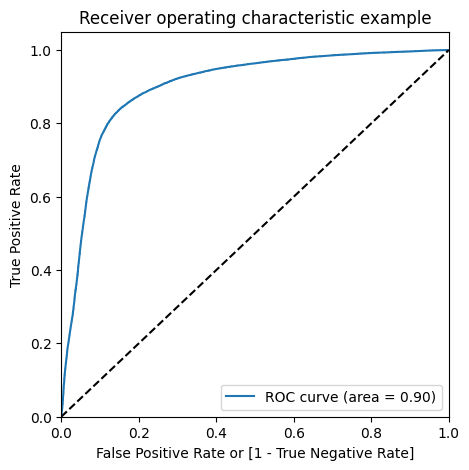

In [93]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [94]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.948716,0,1,1,1,1,1,1,1,1,1,1,1
1,0,0.666871,1,1,1,1,1,1,1,1,1,0,0,0
2,0,0.012800,2,0,1,0,0,0,0,0,0,0,0,0
3,0,0.003097,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.446827,4,0,1,1,1,1,1,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.698573  0.973345  0.423802
0.2   0.2  0.751633  0.957652  0.545615
0.3   0.3  0.787588  0.940336  0.634840
0.4   0.4  0.814745  0.918330  0.711159
0.5   0.5  0.833073  0.887245  0.778900
0.6   0.6  0.843825  0.842051  0.845599
0.7   0.7  0.824104  0.744669  0.903539
0.8   0.8  0.696789  0.440737  0.952842
0.9   0.9  0.588895  0.195286  0.982504


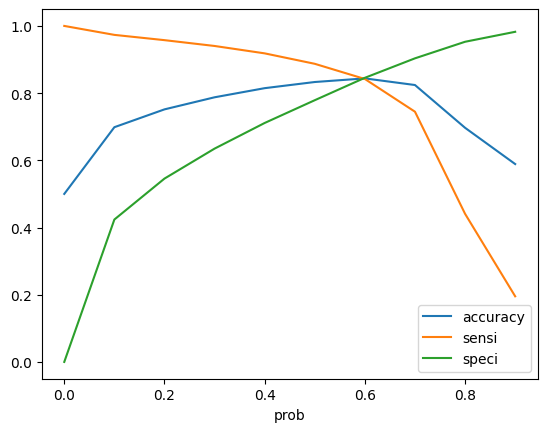

In [96]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above matrix we can conclude that optimal point 0.6 has the best tradeoff.



In [97]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.6 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.948716,0,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.666871,1,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.012800,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.003097,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.446827,4,0,1,1,1,1,1,0,0,0,0,0,0


In [98]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8438251563251563

In [99]:
# Lets check confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[42192,  7704],
       [ 7881, 42015]], dtype=int64)

In [100]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Checking sensitivity, specificity and precision
print("Sensitivity = ",TP / float(TP+FN))
print("Specificity = ",TN / float(TN+FP))
print ("Precision = ",TP / float(TP+FP))
print ("Accuracy = ",metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted))

Sensitivity =  0.842051467051467
Specificity =  0.8455988455988456
Precision =  0.8450491763712061
Accuracy =  0.8438251563251563


Our model now has a good sensitivity, specificity , precision. Also we have improved the accuracy of the model.

### 5.1.5 Prediction on Test data

In [101]:
# Adding constant to test set
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)

In [102]:
# Predictions on test data
y_test_pred = res.predict(X_test_sm)

In [103]:
y_test_pred

28526    0.101917
16275    0.003962
32163    0.341265
17386    0.146991
31790    0.065338
           ...   
58408    0.683967
3774     0.688231
19911    0.702898
42805    0.246212
5209     0.003914
Length: 13651, dtype: float64

In [104]:
# Converting y_pred to a dataframe to make it more convenient
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [105]:
y_pred_1

,0
28526,0.101917
16275,0.003962
32163,0.341265
17386,0.146991
31790,0.065338
...,...
58408,0.683967
3774,0.688231
19911,0.702898
42805,0.246212


In [106]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [107]:
y_test_df.head()

,churn_probability,ID
28526,0.0,28526
16275,0.0,16275
32163,0.0,32163
17386,0.0,17386
31790,0.0,31790


In [108]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [109]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [110]:
y_pred_final.head()

,churn_probability,ID,0
0,0.0,28526,0.101917
1,0.0,16275,0.003962
2,0.0,32163,0.341265
3,0.0,17386,0.146991
4,0.0,31790,0.065338


In [111]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob_final'})
y_pred_final['churn_probability'] = y_pred_final['churn_probability'].map( lambda x: 1 if x > 0.6 else 0)

In [112]:
y_pred_final.head()

,churn_probability,ID,Churn_Prob_final
0,0,28526,0.101917
1,0,16275,0.003962
2,0,32163,0.341265
3,0,17386,0.146991
4,0,31790,0.065338


In [113]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['ID','churn_probability','Churn_Prob_final'])

In [114]:
y_pred_final.head()

,ID,churn_probability,Churn_Prob_final
0,28526,0,0.101917
1,16275,0,0.003962
2,32163,0,0.341265
3,17386,0,0.146991
4,31790,0,0.065338


In [115]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob_final.map(lambda x: 1 if x > 0.6 else 0)

In [116]:
y_pred_final.head()

,ID,churn_probability,Churn_Prob_final,final_predicted
0,28526,0,0.101917,0
1,16275,0,0.003962,0
2,32163,0,0.341265,0
3,17386,0,0.146991,0
4,31790,0,0.065338,0


In [117]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.final_predicted)

0.8424291260713501

In [118]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.final_predicted )
confusion2

array([[10508,  1935],
       [  216,   992]], dtype=int64)

In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Checking sensitivity, specificity and precision
print("Sensitivity = ",TP / float(TP+FN))
print("Specificity = ",TN / float(TN+FP))
print ("Precision = ",TP / float(TP+FP))
print("accuracy:",metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.final_predicted))

Sensitivity =  0.8211920529801324
Specificity =  0.8444908784055292
Precision =  0.33891356337546974
accuracy: 0.8424291260713501


### 5.1.6 Accuracy of the model

Accuracy on test data : 0.842
Sensitivity on test data : 0.821

AUC score : 0.90

**Conclusion**: Logistic Regression Model with RFE is performing very well for the telecom churn prediction.

## 5.2. Logistic Regression with PCA



### 5.2.1 PCA for dimentionality reduction
For our analysis we are using Principal Component Analysis for dimentionality reduction.

In [121]:
# Instantiate PCA
pca = PCA(random_state=42)

In [122]:
# Fit train set on PCA
pca.fit(X_train_smt)

PCA(random_state=42)

In [123]:
# Check principal components
pca.components_

array([[ 2.14460545e-04,  2.52251031e-02,  1.46577855e-02, ...,
         4.26857065e-04, -2.88848042e-03,  9.79898125e-01],
       [-4.61713527e-04,  1.68818795e-01,  1.94179099e-01, ...,
         8.57701928e-02,  6.35117845e-02, -5.43544857e-02],
       [ 4.57646796e-03, -7.79280148e-02, -5.48548817e-02, ...,
        -3.59734416e-02, -3.19072787e-02, -4.48241524e-02],
       ...,
       [ 4.91917854e-05, -6.25840881e-03,  3.02878070e-04, ...,
         3.98837730e-04,  6.19135978e-04,  1.96045377e-04],
       [ 1.66451582e-04,  9.24810107e-03, -4.94589756e-04, ...,
         2.33094283e-04, -6.46577278e-04, -1.63503232e-04],
       [ 2.11545869e-04,  3.32299644e-03,  1.93622326e-04, ...,
         3.12325427e-04, -3.20078376e-04, -5.23546533e-05]])

In [124]:
# Checl Cumuliative varinace of the PCs
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.42919712, 0.51874154, 0.56926744, 0.59857012, 0.62441053,
       0.64689625, 0.66826101, 0.68679979, 0.70145692, 0.71552879,
       0.7265305 , 0.73687516, 0.746715  , 0.7563873 , 0.76567898,
       0.77487282, 0.7834922 , 0.79132346, 0.79830464, 0.80486972,
       0.81114655, 0.81699814, 0.82282575, 0.82828247, 0.83366395,
       0.83891297, 0.84408005, 0.84905743, 0.85384261, 0.85859315,
       0.86321985, 0.86764925, 0.87203196, 0.87615863, 0.88013168,
       0.88399996, 0.88783584, 0.89161933, 0.89531888, 0.89890597,
       0.90231365, 0.90556111, 0.90861916, 0.91163184, 0.91456993,
       0.91741883, 0.92022732, 0.92297343, 0.92568278, 0.92833136,
       0.93089652, 0.93335014, 0.93574508, 0.93805814, 0.94032743,
       0.94250051, 0.94464792, 0.94671499, 0.94877194, 0.95077055,
       0.95272384, 0.95462321, 0.95652132, 0.9582873 , 0.95993595,
       0.96156141, 0.96314099, 0.96468452, 0.96620361, 0.96770763,
       0.96917667, 0.9705943 , 0.97199181, 0.97329955, 0.97455

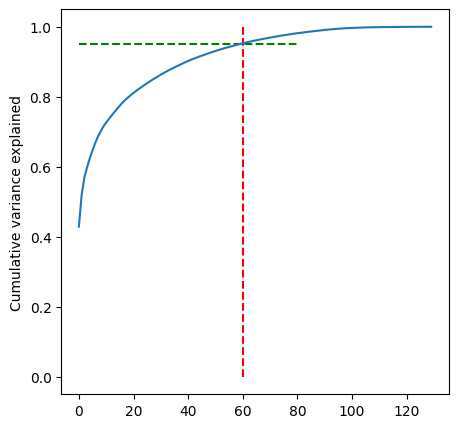

In [125]:
# Plotting Scree plot
fig = plt.figure(figsize=[5,5])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Approx. 95% variance of data is explained with 60 components, hence we can use PCA with 60 components for our dataset.

In [126]:
# PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [127]:
# Fit and transform the X_train
df_train_pca = pca_final.fit_transform(X_train_smt)

In [128]:
# Checking the dimension of new data
df_train_pca.shape

(99792, 60)

In [129]:
# Analysing correlation
corrmat = np.corrcoef(df_train_pca.transpose())

In [130]:
# Applying PCA transformation on our test data
X_test = X_test_main
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(13651, 60)

### 5.2.2 Model building using Logistic Regression

Our objective is to predict a categorical dependent variable using a given set of independent variables, hence we need to build a classification model. Here we are building a logistic Regression model with hypertuning.

In [131]:
# Instantiating a Logistic Regression Model
learner_pca = LogisticRegression()

In [132]:
# Applying Logistic Regression model to our PCA
model_pca = learner_pca.fit(df_train_pca, y_train_smt)

In [133]:
# Applying transformation to test data
df_test_pca = pca_final.transform(X_test)

### 5.2.2 Model Predictions


In [134]:
# Making predictions
predictions = model_pca.predict(df_test_pca)

# Probability predictions
predictions_prob = model_pca.predict_proba(df_test_pca)
#pred_probs_test = model_pca.predict_proba(df_test_pca)

In [135]:
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [136]:
predictions_prob

array([[0.92412424, 0.07587576],
       [0.99500682, 0.00499318],
       [0.56351557, 0.43648443],
       ...,
       [0.34709713, 0.65290287],
       [0.72572577, 0.27427423],
       [0.99603483, 0.00396517]])

### 5.2.3 Model Evaluation

In [137]:
y_test_log = y_test.map( lambda x: 1 if x > 0.5 else 0)
y_test_log.value_counts()

churn_probability
0    12443
1     1208
Name: count, dtype: int64

In [138]:
results = confusion_matrix(y_test_log, predictions) 
results

array([[10127,  2316],
       [  197,  1011]], dtype=int64)

In [139]:
# Metrics for Training data
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_log, predictions))

Accuracy:- 0.8159109222767563


In [140]:
# Classification report
print(classification_report(y_test_log,predictions))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89     12443
           1       0.30      0.84      0.45      1208

    accuracy                           0.82     13651
   macro avg       0.64      0.83      0.67     13651
weighted avg       0.92      0.82      0.85     13651



In [141]:
# AUC
auc = np.round(roc_auc_score(y_test_log, predictions), 3)

print("Auc for our test data is {}". format(auc))

Auc for our test data is 0.825


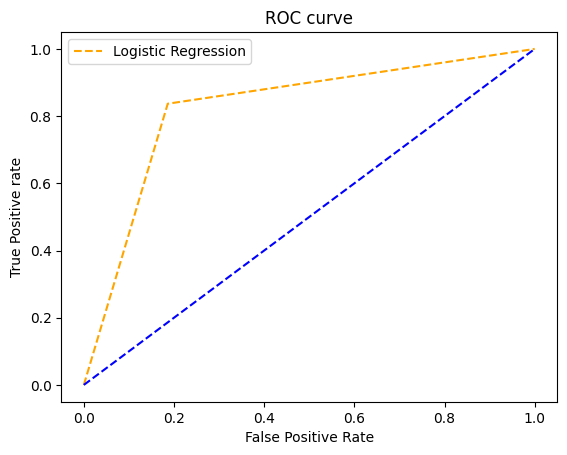

In [142]:
# matplotlib
import matplotlib.pyplot as plt
# plt.style.use('seaborn')
fpr1, tpr1, thresh1 = roc_curve(y_test_log, predictions, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test_log, predictions, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test_log, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

### 5.2.4 Model Accuracy

Accuracy of the model : 0.82

Sensitivity : 0.83

AUC : 0.83

Model is performing well for the telecom churn prediction data. 

## 5.3 DecisionTreeClassifier

### 5.3.1 Instantiating Decision Tree model

In [143]:
# Instantiating the Decision Tree
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

### 5.3.2 Model training

In [144]:
dt_base.fit(X_train_smt, y_train_smt)

DecisionTreeClassifier(max_depth=4, random_state=42)

### 5.3.3 Model Prediction

In [145]:
y_train_pred = dt_base.predict(X_train_smt)
y_test_pred = dt_base.predict(X_test)

### 5.3.4 Model Evaluation

In [146]:
print("Accuracy on Training Data :-" , metrics.accuracy_score(y_train_smt, y_train_pred))

Accuracy on Training Data :- 0.8749098124098124


In [147]:
print("Accuracy on Test Data :-" , metrics.accuracy_score(y_test_log, y_test_pred))

Accuracy on Test Data :- 0.8758332722877444


In [148]:
print(classification_report(y_test_log, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     12443
           1       0.40      0.80      0.53      1208

    accuracy                           0.88     13651
   macro avg       0.69      0.84      0.73     13651
weighted avg       0.93      0.88      0.89     13651



Model Accuracy : 0.88

Model Recall : 0.84

Let's try to hypertune and see if we can improvise the model

### 5.3.5 ROC Plot

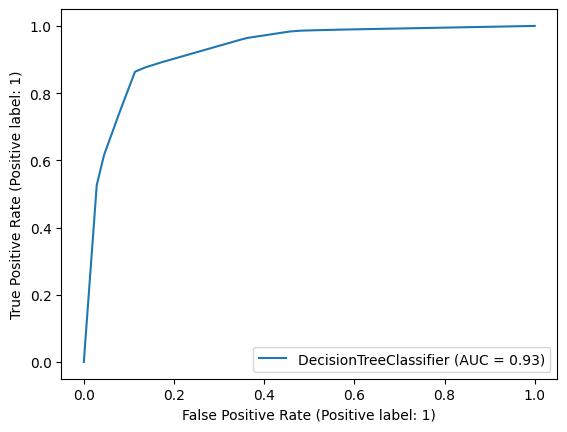

In [149]:
RocCurveDisplay.from_estimator(dt_base, X_train_smt, y_train_smt,drop_intermediate=True)
plt.show()

The AUC score is 0.93, i.e, the model can correctly explain 93% of variances in the dataset which is quite good. 
For the telecom churn model True positive rate is more important than false positive rate because we do not want to miss identifying a churning customer as non-churn - it will result in loosing the customer.
So, lets hypertune the Decision Tree to check if we can move our curve closer to the TPR

### 5.3.6 Hypertuning Decision Tree with GridSearch

In [ ]:
# Instantiating a Decision Tree
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Declaring Tree parameters
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [ ]:
# Initiating Grid Search
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [200]:
%%time
grid_search.fit(X_train_smt, y_train_smt)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 54.5 s
Wall time: 1min 54s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='recall', verbose=1)

In [ ]:
# Find best score for Grid Search
grid_search.best_score_

0.918951418951419

In [ ]:
# Find best Estimators for the Decision Tree
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

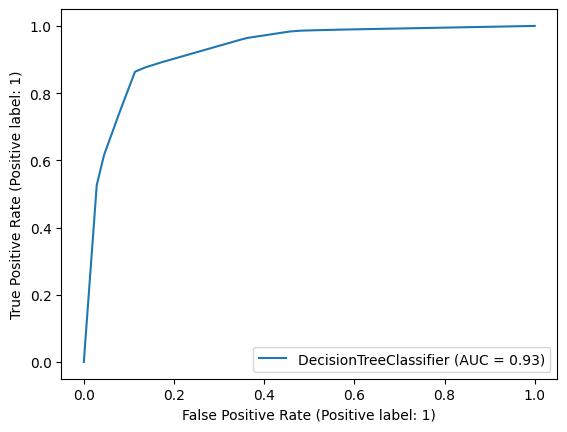

In [ ]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(dt_base, X_train_smt, y_train_smt,drop_intermediate=True)
plt.show()

In [ ]:
# Hypertuning the Tree
dt_tuned = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [ ]:
# Fit the train data
dt_tuned.fit(X_train_smt, y_train_smt)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [247]:
# Access feature importance

dt_tuned_fi = pd.DataFrame(
    data=dt_tuned.feature_importances_,
    columns=['importance'],
    index=X_train_smt.columns
).sort_values(by=['importance'],ascending=False)

In [248]:
dt_tuned_fi

,importance
loc_ic_mou_8,0.486245
roam_og_mou_8,0.163681
day_of_last_rech_8,0.062146
last_day_rch_amt_8,0.055078
total_rech_amt_8,0.048529
...,...
sachet_3g_8,0.000000
vol_2g_mb_6,0.000000
og_others_7,0.000000
offnet_mou_8,0.000000


In [ ]:
# Model predictions
y_train_pred = dt_tuned.predict(X_train_smt)
y_test_pred = dt_tuned.predict(X_test)

In [ ]:
# Model Evaluation
print("Accuracy on Test Data :-" , metrics.accuracy_score(y_test_log, y_test_pred))
print("Classification Report :- \n", classification_report(y_test_log, y_test_pred))


Accuracy on Test Data :- 0.8877005347593583
Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94     12443
           1       0.43      0.79      0.56      1208

    accuracy                           0.89     13651
   macro avg       0.70      0.84      0.75     13651
weighted avg       0.93      0.89      0.90     13651



### 5.3.67 Hypertuning Decision Tree with PCA

In [211]:
dt_pca = DecisionTreeClassifier(random_state=42)
dt_pca.fit(df_train_pca, y_train_smt)

DecisionTreeClassifier(random_state=42)

In [213]:
dt_pca.fit(df_train_pca, y_train_smt)

DecisionTreeClassifier(random_state=42)

In [249]:
# Access feature importance

dt_tuned_pca = pd.DataFrame(
    data=dt_tuned.feature_importances_,
    columns=['importance'],
    index=X_train_smt.columns
).sort_values(by=['importance'],ascending=False)

In [250]:
dt_tuned_pca

,importance
loc_ic_mou_8,0.486245
roam_og_mou_8,0.163681
day_of_last_rech_8,0.062146
last_day_rch_amt_8,0.055078
total_rech_amt_8,0.048529
...,...
sachet_3g_8,0.000000
vol_2g_mb_6,0.000000
og_others_7,0.000000
offnet_mou_8,0.000000


In [272]:
# Predictions on the PCA-transformed dataset
y_test_pred = dt_pca.predict(df_test_pca)

In [273]:
# Model Evaluation
print("Accuracy on Test Data :-" , metrics.accuracy_score(y_test_log, y_test_pred))
print("AUC :-" , np.round(roc_auc_score(y_test_log, y_test_pred), 3))
print("Classification Report :- \n", classification_report(y_test_log, y_test_pred))


Accuracy on Test Data :- 0.8358362024760091
AUC :- 0.701
Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.86      0.91     12443
           1       0.28      0.54      0.37      1208

    accuracy                           0.84     13651
   macro avg       0.61      0.70      0.64     13651
weighted avg       0.89      0.84      0.86     13651



In [234]:
# Creating feature list

# Create a DataFrame to display the contributions of original features to each principal component
df_components = pd.DataFrame(data=pca_final.components_, columns=X_train_smt.columns)
df_components.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,day_of_last_rech_data_6
0,0.000214,0.025226,0.014658,0.011386,-0.003013,-0.003585,-0.002182,0.003487,0.000401,0.000365,...,0.021704,0.016986,-0.002194,0.025404,0.032903,0.038430,0.020171,0.000426,-0.002888,0.979898
1,-0.000460,0.168827,0.194199,0.169136,0.129186,0.141753,0.120020,0.156023,0.172322,0.145859,...,0.005594,0.007026,0.034394,0.031610,0.029845,0.021962,0.070423,0.085772,0.063526,-0.054358
2,-0.004574,0.077941,0.054889,-0.006568,0.160310,0.138918,0.076262,0.082581,0.066117,0.009577,...,-0.008025,-0.007551,-0.102949,-0.053496,-0.053242,-0.049826,0.064309,0.035946,0.031932,0.044825
3,0.000211,0.018580,0.075722,0.106117,-0.056493,-0.026601,0.002468,-0.039925,-0.000181,0.031480,...,0.011508,0.012252,0.032693,0.091211,0.096602,0.090854,-0.056168,0.002626,0.036092,-0.027325
4,0.003670,-0.200965,0.037652,0.177365,-0.148813,0.034690,0.135028,-0.185498,0.022382,0.142499,...,0.044237,0.052183,-0.010712,0.058529,0.038804,0.003830,-0.079515,0.136357,0.187343,-0.001965


In [235]:
# Print the top features contributing to each principal component
for i in range(60):
    print(f"Top features for PC{i+1}:")
    sorted_features_dt_pca = df_components.iloc[i].abs().sort_values(ascending=False)
    print(sorted_features_dt_pca.head())
    print("=" * 80)

Top features for PC1:
day_of_last_rech_data_6    0.979898
av_rech_amt_data_6         0.076643
sachet_2g_6                0.075606
vol_2g_mb_6                0.052329
sachet_2g_7                0.048808
Name: 0, dtype: float64
Top features for PC2:
total_og_mou_7      0.196654
arpu_7              0.194199
total_rech_amt_7    0.189781
total_og_mou_6      0.179967
offnet_mou_7        0.172322
Name: 1, dtype: float64
Top features for PC3:
std_og_mou_6        0.255277
std_og_mou_7        0.219703
std_og_t2t_mou_6    0.215896
std_og_t2t_mou_7    0.187476
std_og_t2m_mou_6    0.184942
Name: 2, dtype: float64
Top features for PC4:
roam_ic_mou_7    0.369411
roam_og_mou_7    0.349597
roam_ic_mou_8    0.337497
roam_og_mou_8    0.307475
roam_ic_mou_6    0.276995
Name: 3, dtype: float64
Top features for PC5:
total_rech_num_8    0.203790
arpu_6              0.200965
total_og_mou_6      0.199518
total_rech_amt_6    0.198913
std_og_mou_8        0.194052
Name: 4, dtype: float64
Top features for PC6:
std

In [291]:
sorted_features_dt_pca.index

Index(['last_day_rch_amt_8', 'last_day_rch_amt_6', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_7',
       'monthly_2g_7', 'vol_3g_mb_7', 'std_og_t2f_mou_7', 'monthly_2g_8',
       ...
       'total_og_mou_8', 'day_of_last_rech_data_6', 'day_of_last_rech_7',
       'spl_og_mou_7', 'std_og_t2t_mou_8', 'isd_ic_mou_8',
       'day_of_last_rech_8', 'loc_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'loc_og_mou_6'],
      dtype='object', length=130)

## 5.4 Random Forest Regressor with PCA

### 5.4.1 Instantiating Model

In [157]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train_smt, y_train_smt)

RandomForestClassifier(n_jobs=-1)

### 5.4.2 Feature Elimination

In [158]:
feature_importances = pd.DataFrame({'col':X_train_smt.columns, 'importance':rf.feature_importances_})

<BarContainer object of 130 artists>

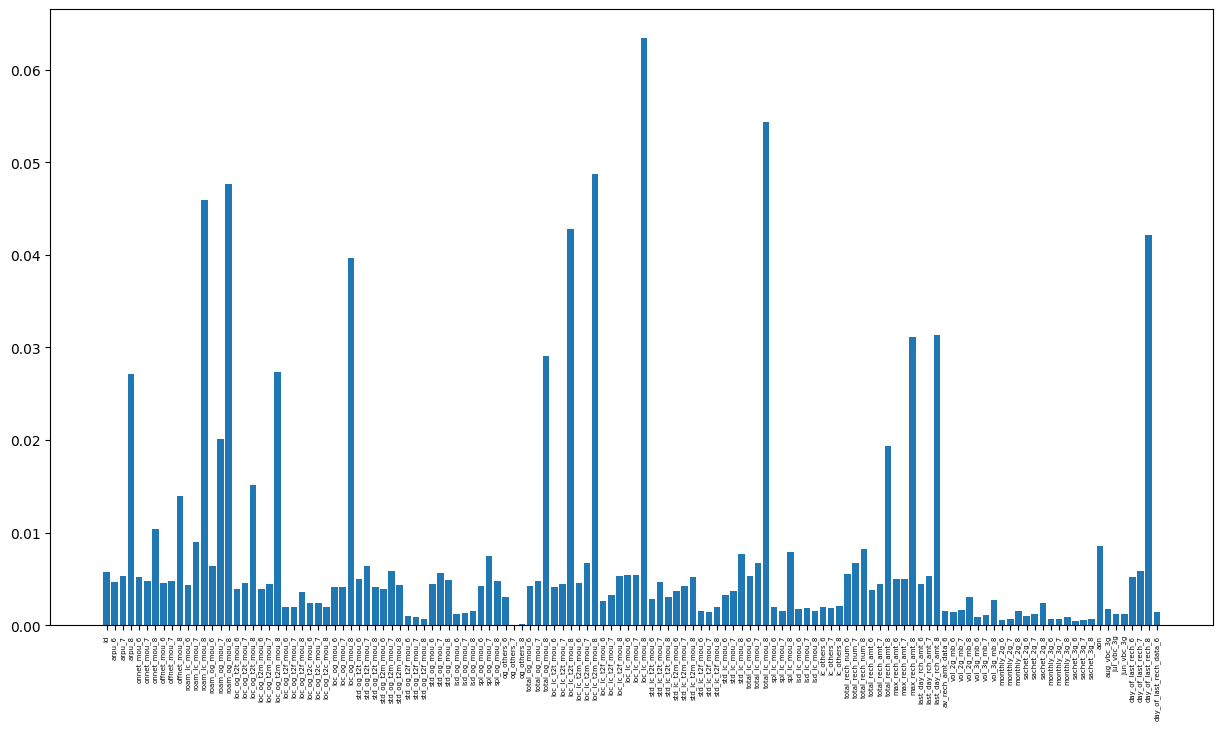

In [159]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=5)
plt.bar(feature_importances['col'], feature_importances['importance'])

### 5.4.3 Model Training

We will be reusing the PCA model with 60 components which we have estimated in the earlier section.

In [160]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(df_train_pca, y_train_smt)

RandomForestClassifier(n_jobs=-1)

In [161]:
feature_importances = pd.DataFrame({'col':['component_'+str(i) for i in range(60)], 
                                    'importance':rf.feature_importances_})

### 5.4.4 Model Prediction

In [162]:
y_train_pred = rf.predict(df_train_pca)
y_test_pred = rf.predict(df_test_pca)

### 5.4.5 Model Evaluation

In [163]:
print("Accuracy on Test Data :-" , metrics.accuracy_score(y_test_log, y_test_pred))
print("Confusion Matrix for Test data :-\n" , classification_report(y_test_log, y_test_pred))

Accuracy on Test Data :- 0.9109222767562816
Confusion Matrix for Test data :-
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     12443
           1       0.50      0.59      0.54      1208

    accuracy                           0.91     13651
   macro avg       0.73      0.77      0.75     13651
weighted avg       0.92      0.91      0.91     13651



Although accuracy of the model seems good, we also want to improve the recall. Lets perform some hypertuning on the model

### 5.4.6 Model Hypertuning

In [164]:
# Create the parameter grid based on the results of random search 

params =  {'max_depth': [1, 2, 5, 10, 20],
            'min_samples_leaf': [50, 100, 200, 300],
            'max_features': [4,5, 6, 7],
            'n_estimators': [500, 600, 700, 800],
            'criterion':['gini','entropy']
          }

In [165]:
# Initiate Randomizedsearch

grid_search = RandomizedSearchCV(estimator=rf, 
                                 param_distributions=params, 
                                 cv=5, 
                                 n_jobs=-1, 
                                 verbose=1, 
                                 scoring = "accuracy")

In [ ]:
# Fit Model on training set
grid_search.fit(df_train_pca,y_train_smt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 5, 10, 20],
                                        'max_features': [4, 5, 6, 7],
                                        'min_samples_leaf': [50, 100, 200, 300],
                                        'n_estimators': [500, 600, 700, 800]},
                   scoring='accuracy', verbose=1)

In [ ]:
# Find the most best score for the search
grid_search.best_score_

0.8765733628073236

In [ ]:
# Find the most optimal parameters for Cross-Validation

grid_search.best_params_

{'n_estimators': 800,
 'min_samples_leaf': 50,
 'max_features': 7,
 'max_depth': 20,
 'criterion': 'entropy'}

In [ ]:
# Tune the model with the optimal parameters

rf_tuned = RandomForestClassifier(n_estimators=800,
                                  min_samples_leaf=50,
                                  max_features=7,
                                  max_depth=20,
                                  criterion='entropy',
                                  class_weight='balanced',
                                  random_state=42, 
                                  n_jobs=-1,
                                  verbose=1)

In [ ]:
## Train the tuned Random Forest model with features by PCA

rf_tuned.fit(df_train_pca, y_train_smt)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  2.9min finished


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features=7, min_samples_leaf=50,
                       n_estimators=800, n_jobs=-1, random_state=42, verbose=1)

### 5.4.7 Model evaluation after hypertuning

In [ ]:


print("Accuracy on Test Data :-" , metrics.accuracy_score(y_test_log, y_test_pred))
print("Confusion Matrix for Test data :-\n" , classification_report(y_test_log, y_test_pred))

Accuracy on Test Data :- 0.8358362024760091
AUC :- 0.701
Confusion Matrix for Test data :-
               precision    recall  f1-score   support

           0       0.95      0.86      0.91     12443
           1       0.28      0.54      0.37      1208

    accuracy                           0.84     13651
   macro avg       0.61      0.70      0.64     13651
weighted avg       0.89      0.84      0.86     13651



# 6. Summary & Recommendation

Summarizing our findings from the models. We have considered the final evaluation results for each model(after hypertuning/feature elimination) rather than the baseline model.

|Model |Sensitivity|Accuracy|
|:-----|:----:|----:|
|Logistic Regression with RFE |0.82 |0.84 |
|Logistic Regression with PCA |0.82 |0.82 |
|Decision Tree with GridSearch |0.82 |0.87 |
|Decision Tree with PCA |0.70 |0.84 |
|Random Forest with PCA |0.77 |0.94 |

For telecom churn case study, our objective is to identify customers who are more prone to churning. 
- If we miss identifying customers who can churn as non-churn we will loose the customer
- If we identify non-churn customers as churn, we might take additional measures to retain them although it is not neccessary.

However, the first point is more critical to us than the second one with regards to our main objective.

Therefore, we will go with the model with highest sensitivity. Decision Tree with GridSearch is performing well, but we could see its accuracy comes down to 87% in test data while in training data it has 98%. Because the model is sensitive to overfitting, we will not use this model for our analysis. Instead we will use the next best model which is Logistic Regression with RFE.

So we will select Logistic Regression with RFE for our analysis as it has the highest accuracy and sensitivity. Also it has a good AUC score of 0.90

The main features which are helping in our prediction are as follows :-
 - 'offnet_mou_8',
 - 'loc_og_t2m_mou_8',
 - 'loc_ic_t2m_mou_8',
 - 'loc_ic_mou_7',
 - 'std_og_mou_8',
 - 'loc_ic_t2t_mou_8',
 - 'loc_og_t2t_mou_8',
 - 'last_day_rch_amt_8',
 - 'loc_ic_t2f_mou_8',
 - 'aon',
 - 'day_of_last_rech_8',
 - 'roam_og_mou_8',
 - 'spl_ic_mou_8']

**Some recommendations to lower the risk of customer churn based on our analysis :-**

- During the first two months, the chances of a customer to stop the service is almost same as happy customers but he chances decrease significantly in the action phase. If a customer does not churn in the first two months, he is more likely to continue the service in the next months. So telecom companies should try to make sure customers do not leave within the first two months(good phase)

- After the first two months, churn probability is higher for customers whose total recharge amount is low. So telecom companies can reach out to the customers who have started to recharge with lesser amount suddenly after few months of joining the network.

- It is seen that customers who recharges less number of times are more probable to churn, so telecom companies can revisit the customers who do not seem to increase their recharge count for a longer period of time.





# 7. Pipeline Creation

Let's build a pipeline to fit and score the model faster.

The steps of this pipeline would be the following, but this is only one type of pipeline -
1. Imputation
2. Scaling
3. RFE
4. Classification model


In [338]:
imp_p = SimpleImputer(strategy='constant', fill_value=0)
scale_p = StandardScaler()
rfe_p = RFE(estimator=LogisticRegression(), n_features_to_select=15)   
logreg_p = LogisticRegression(max_iter=1000, tol=0.001)

In [339]:
pipe = Pipeline(steps = [('imputation',imp_p),
                         ('scaling',scale_p),
                         ('pca',rfe_p),
                         ('model',logreg_p)])

In [340]:
new_vars1 = X_train_smt

In [341]:
pipe.fit(X_train_filtered[final_features_list], y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()),
                ('pca',
                 RFE(estimator=LogisticRegression(), n_features_to_select=15)),
                ('model', LogisticRegression(max_iter=1000, tol=0.001))])

In [343]:
train_score = pipe.score(X_train_filtered[final_features_list], y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.9199831504917493


In [345]:
test_score = pipe.score(X_test[final_features_list], y_test_log)
print("Test accuracy:", test_score)

Test accuracy: 0.917954728591312


Let's make a confusion matrix to analyze how each class is being predicted by the model.

In [347]:
confusion_matrix(y_train, pipe.predict(X_train_filtered[final_features_list]))

array([[49420,   476],
       [ 3893,   812]], dtype=int64)

In [348]:
confusion_matrix(y_test_log, pipe.predict(X_test[final_features_list]))

array([[12322,   121],
       [  999,   209]], dtype=int64)

In [349]:
precision_score(y_test_log, pipe.predict(X_test[final_features_list]),average='micro')

0.917954728591312

In [351]:
recall_score(y_test_log, pipe.predict(X_test[final_features_list]),average='micro')

0.917954728591312

# 6. Creating submission file

For submission, we need to make sure that the format is exactly the same as the sample.csv file. It contains 2 columns, id and churn_probability

In [352]:
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


The submission file should contain churn_probability values that have to be predicted for the unseen data provided (test.csv)

In [354]:
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8,churn_probability
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0.00,0.00,0.00,21.0,26.0,24.0,NaN,NaN,NaN,0
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0.00,0.00,0.00,19.0,16.0,24.0,NaN,NaN,NaN,0
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,525.61,758.41,241.84,29.0,27.0,28.0,NaN,NaN,NaN,0
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0.00,0.00,0.00,25.0,30.0,24.0,NaN,NaN,NaN,0
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0.00,0.00,0.00,29.0,29.0,30.0,NaN,NaN,NaN,0


Lets first select the columns that we want to work with (or create them, if you have done any feature engineering)

In [355]:
print(final_features_list)

['offnet_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_7', 'std_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2t_mou_8', 'last_day_rch_amt_8', 'loc_ic_t2f_mou_8', 'aon', 'day_of_last_rech_8', 'roam_og_mou_8', 'spl_ic_mou_8']


In [356]:
submission_data = unseen.set_index('id')[final_features_list]
submission_data.shape

(30000, 13)

Next, lets create a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data

In [357]:
unseen['churn_probability'] = pipe.predict(submission_data)
output = unseen[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


Finally, lets create a csv file out of this dataset, ensuring to set index=False to avoid an addition column in the csv.

In [358]:
output.to_csv('submission_pca_lr_13jul.csv',index=False)

You can now take this file and upload it as a submission on Kaggle.